In [2]:
from PythonHead import *
from datetime import *
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Lendo os dados

In [17]:
dataFrame = pd.read_csv('fiscaldecu-dez23.csv')
print(f"Temos um total de {len(dataFrame)} cocôs!")

Temos um total de 654 cocôs!


In [18]:
labelNomes = {'André': 'André',# 'Arretado': 'Arretado',
              'Caio': '+49 176 70025878', 'Chris': '+55 16 99741-7879',
              'Eskeleto': 'Eskeleto', 'Gabbana': 'Gabbana', 'Kaka': 'Kaka', 'Ness': 'Henrique',
              'Paula': 'Paula Pincela',# 'Pelanza': '+49 176 62052780', 
              'Rafael': 'Rafael Lang',
              'Regueba': '+49 176 36810092', 'Vira': '+45 26 77 56 25', 'Zizi': '+52 81 1526 6908', 'Caïque': 'Caïque'
              }
print(f"Temos {len(labelNomes)} competidores!")

Temos 13 competidores!


In [19]:
dataFrameIndividual = {}
for nome in labelNomes:
    dataFrameIndividual[nome] = dataFrame[dataFrame['username'] == labelNomes[nome]]

listaGabbana = np.array(dataFrameIndividual['Gabbana']['message'])
flagCaique = []
for i in listaGabbana:
    if 'Caíque' in i or 'caíque' in i or 'Caique' in i or 'caique' in i or 'Caïque' in i or 'caïque' in i:
        flagCaique.append(True)
    else:
        flagCaique.append(False)
flagCaique=np.array(flagCaique)

dataFrameIndividual['Caïque'] = dataFrameIndividual['Gabbana'][flagCaique]
dataFrameIndividual['Gabbana'] = dataFrameIndividual['Gabbana'][~flagCaique]

## Corrigindo fuso horário

In [20]:
fuso = {'André': +4, #'Arretado': 0,
        'Caio': +4, 'Chris': -2,
              'Eskeleto': +4, 'Gabbana': +4, 'Kaka': -2, 'Ness': 0,
              'Paula': +4, #'Pelanza': +4, 
        'Rafael': 0,
              'Regueba': +4, 'Vira': +4, 'Zizi': -3, 'Caïque': +4
              }

for nome in fuso:
    a = []
    for i in range(len(dataFrameIndividual[nome])):
        t = datetime.strptime((dataFrameIndividual[nome]['date'].iloc[i])[2:],'%y-%m-%d %H:%M:%S')
        if (nome == 'Eskeleto' and t.day < 16):
            t = t+timedelta(hours=fuso[nome])
        elif (nome == 'Chris' and t.day < 15):
            t = t+timedelta(hours=fuso[nome])
        elif (nome == 'Vira' and t.day < 17):
            t = t+timedelta(hours=fuso[nome])
        elif (nome == 'Vira'):
            t = t+timedelta(hours=fuso[nome]-1)
        else:
            t = t+timedelta(hours=fuso[nome])
        a.append( t.strftime('20%y-%m-%d %H:%M:%S') )

    dataFrameIndividual[nome]['local-date'] = a
        
# Eskeleto -> 16 -> +4 -> 0
# Chris -> 15 -> -2 -> 0
# Vira -> 17 -> +4 -> +3

/tmp/ipykernel_6282/17378520.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrameIndividual[nome]['local-date'] = a
/tmp/ipykernel_6282/17378520.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrameIndividual[nome]['local-date'] = a
/tmp/ipykernel_6282/17378520.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

# Calculando variáveis

## Total de cocôs e memória de merda

In [21]:
totalDeCocos = []
diferencaEntreMensagensECocos = []
for nome in labelNomes:
    if (nome != 'Caïque'):
        totalDeCocos.append( int(np.array(dataFrameIndividual[nome]['message'])[-1]) )
        diferencaEntreMensagensECocos.append( len(dataFrameIndividual[nome]) - int(np.array(dataFrameIndividual[nome]['message'])[-1]) )
    else:
        totalDeCocos.append( int(np.array(dataFrameIndividual[nome]['message'])[-1][7:]) )
        diferencaEntreMensagensECocos.append( len(dataFrameIndividual[nome]) - int(np.array(dataFrameIndividual[nome]['message'])[-1][7:]) )

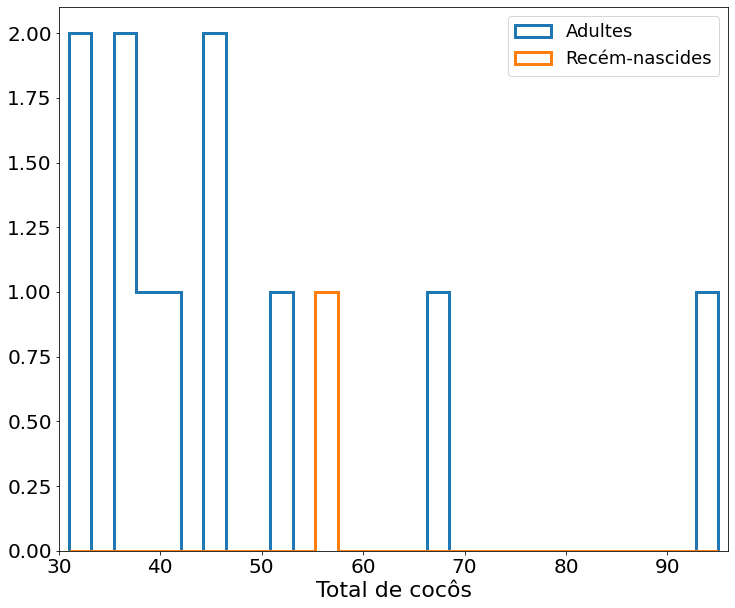

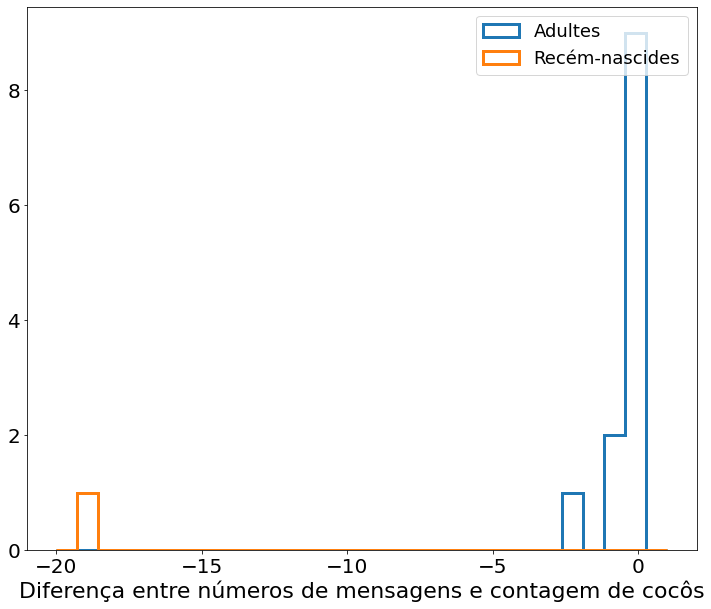

In [44]:
plt.hist(totalDeCocos[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(np.min(totalDeCocos)-1,np.max(totalDeCocos)+1,30))
plt.hist(totalDeCocos[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(np.min(totalDeCocos)-1,np.max(totalDeCocos)+1,30))
plt.xlabel("Total de cocôs")
plt.legend()
plt.xlim([np.min(totalDeCocos)-2,np.max(totalDeCocos)+2])
plt.show()

plt.hist(diferencaEntreMensagensECocos[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(np.min(diferencaEntreMensagensECocos)-1,np.max(diferencaEntreMensagensECocos)+1,30))
plt.hist(diferencaEntreMensagensECocos[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(np.min(diferencaEntreMensagensECocos)-1,np.max(diferencaEntreMensagensECocos)+1,30))
plt.xlabel("Diferença entre números de mensagens e contagem de cocôs")
plt.legend()
plt.xlim([np.min(diferencaEntreMensagensECocos)-2,np.max(diferencaEntreMensagensECocos)+2])
plt.show()

## Tempo entre cocôs

In [45]:
menorTempoEntreCocos = [] #minutos
maiorTempoEntreCocos = [] #horas
for nome in labelNomes:
    array = np.array(dataFrameIndividual[nome]['date'])
    menor = 1e10
    maior = 0
    for i in range(len(array)-1):
        t1 = datetime.strptime(array[i][2:],'%y-%m-%d %H:%M:%S')
        t2 = datetime.strptime(array[i+1][2:],'%y-%m-%d %H:%M:%S')
        if ((t2-t1).seconds / 60. + (t2-t1).days *24.*60) < menor and ((t2-t1).seconds) > 0:
            menor = (t2-t1).seconds / 60. + (t2-t1).days *24*60.
        if ((t2-t1).seconds / 3600. + (t2-t1).days *24.) > maior:
            maior = (t2-t1).seconds / 3600 + (t2-t1).days *24.
    menorTempoEntreCocos.append(menor)
    maiorTempoEntreCocos.append(maior)

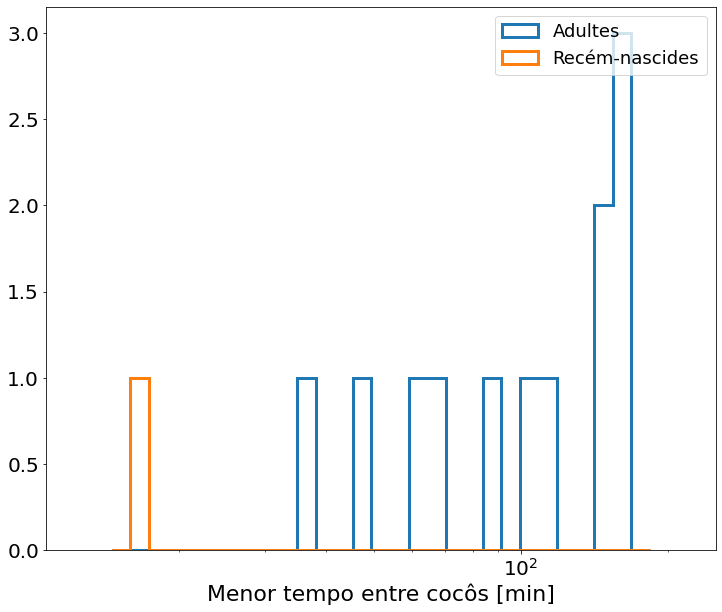

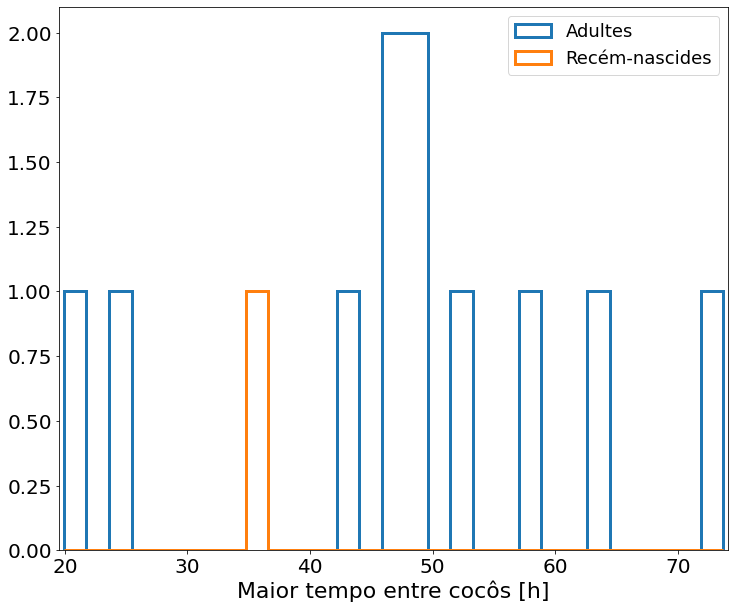

In [46]:
plt.hist(menorTempoEntreCocos[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.logspace(np.log10(np.min(menorTempoEntreCocos)/1.1),np.log10(np.max(menorTempoEntreCocos)*1.1),30))
plt.hist(menorTempoEntreCocos[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.logspace(np.log10(np.min(menorTempoEntreCocos)/1.1),np.log10(np.max(menorTempoEntreCocos)*1.1),30))
plt.xlabel("Menor tempo entre cocôs [min]")
plt.legend()
plt.xlim([np.min(menorTempoEntreCocos)/1.5,np.max(menorTempoEntreCocos)*1.5])
plt.xscale('log')
plt.show()

plt.hist(maiorTempoEntreCocos[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(np.min(maiorTempoEntreCocos)-1.1,np.max(maiorTempoEntreCocos)+1.1,30))
plt.hist(maiorTempoEntreCocos[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(np.min(maiorTempoEntreCocos)-1.1,np.max(maiorTempoEntreCocos)+1.1,30))
plt.xlabel("Maior tempo entre cocôs [h]")
plt.legend()
plt.xlim([np.min(maiorTempoEntreCocos)-1.5,np.max(maiorTempoEntreCocos)+1.5])
#plt.xscale('log')
plt.show()


## Dias sem fazer cocô

In [47]:
totalDeDiasSemCoco = []
maximoDeCocosEmUmDia = []
maximoDeCocosAteMeioDia = []
diaDoMaximo = []
diaDoMaximoAteMeioDia = []
for nome in labelNomes:
    dia = datetime(year=2023,month=11,day=30)
    maximo = 0
    total = 0
    maximoAteMeioDia = 0
    array = np.array(dataFrameIndividual[nome]['local-date'])
    for i in range(31):
        dia = dia + timedelta(days=1)
        numeroDeCocos = 0
        numeroDeCocosAteMeioDia = 0
        for j in range(len(dataFrameIndividual[nome])):
            if (datetime.strptime(array[j][2:],'%y-%m-%d %H:%M:%S').date() == dia.date()):
                numeroDeCocos += 1
                if datetime.strptime(array[j][2:],'%y-%m-%d %H:%M:%S').hour < 12:
                    numeroDeCocosAteMeioDia += 1
            elif (datetime.strptime(array[j][2:],'%y-%m-%d %H:%M:%S').date() > dia.date()):
                continue
        if numeroDeCocos == 0:
            total += 1
        if numeroDeCocos > maximo:
            maximo = numeroDeCocos
            diaMaximo = dia.date()
        if numeroDeCocosAteMeioDia > maximoAteMeioDia:
            maximoAteMeioDia = numeroDeCocosAteMeioDia
            diaMaximoAteMeioDia = dia.date()
    totalDeDiasSemCoco.append( total )
    maximoDeCocosEmUmDia.append( maximo )
    maximoDeCocosAteMeioDia.append( maximoAteMeioDia )
    diaDoMaximo.append( diaMaximo.strftime("%d/%m") )
    diaDoMaximoAteMeioDia.append( diaMaximoAteMeioDia.strftime("%d/%m") )

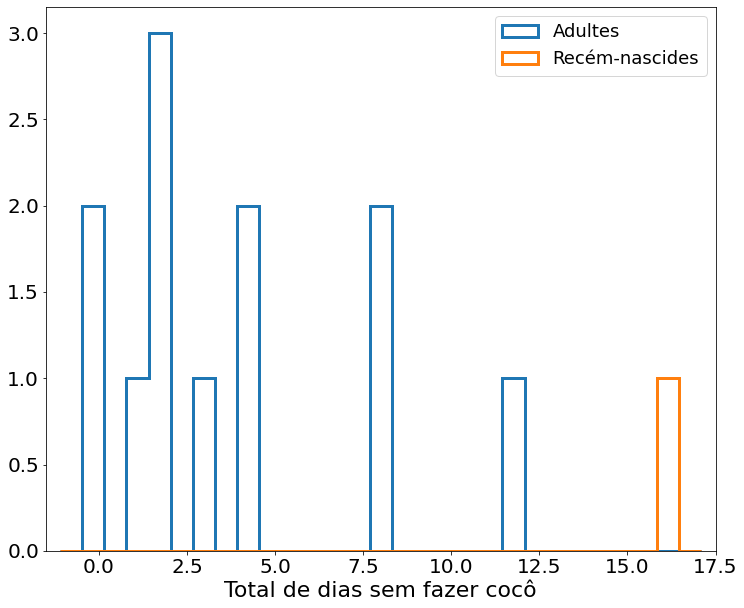

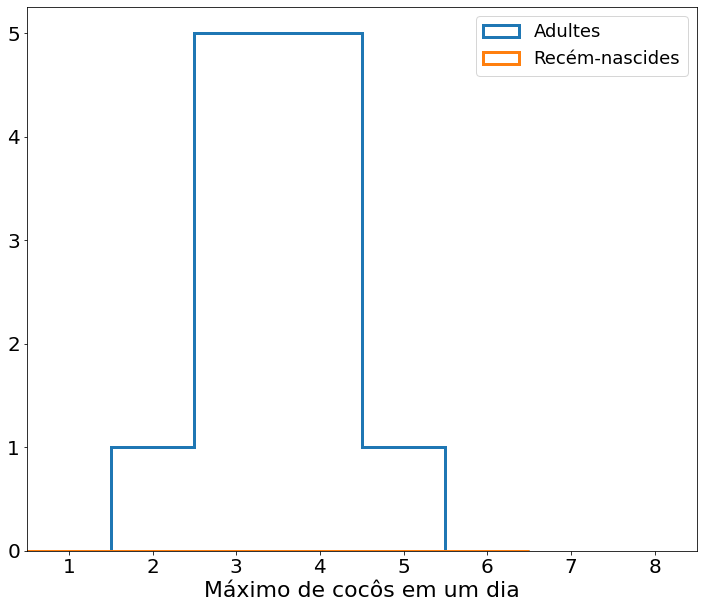

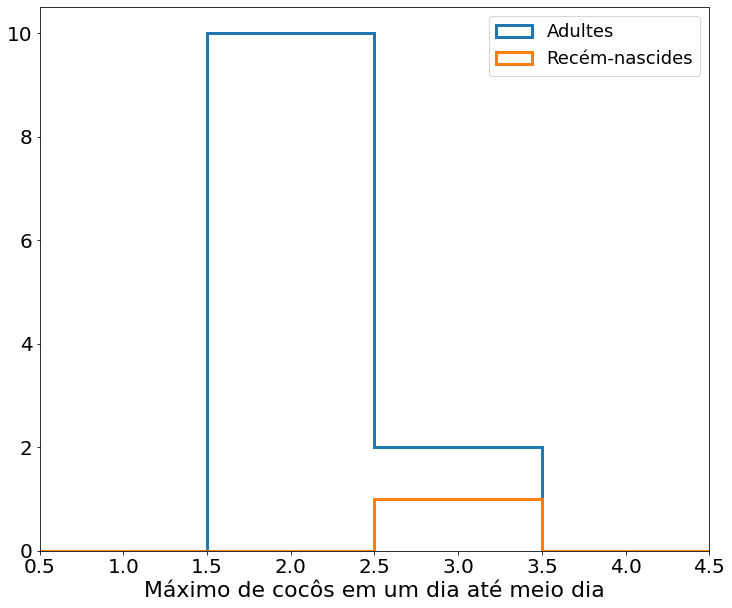

In [48]:
plt.hist(totalDeDiasSemCoco[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(np.min(totalDeDiasSemCoco)-1.1,np.max(totalDeDiasSemCoco)+1.1,30))
plt.hist(totalDeDiasSemCoco[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(np.min(totalDeDiasSemCoco)-1.1,np.max(totalDeDiasSemCoco)+1.1,30))
plt.xlabel("Total de dias sem fazer cocô")
plt.legend()
plt.xlim([np.min(totalDeDiasSemCoco)-1.5,np.max(totalDeDiasSemCoco)+1.5])
#plt.xscale('log')
plt.show()

plt.hist(maximoDeCocosEmUmDia[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(-0.5,6.5,8))
plt.hist(maximoDeCocosEmUmDia[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(-0.5,6.5,8))
plt.xlabel("Máximo de cocôs em um dia")
plt.legend()
plt.xlim([np.min(maximoDeCocosEmUmDia)-1.5,np.max(maximoDeCocosEmUmDia)+1.5])
#plt.xscale('log')
plt.show()

plt.hist(maximoDeCocosAteMeioDia[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(-0.5,6.5,8))
plt.hist(maximoDeCocosAteMeioDia[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(-0.5,6.5,8))
plt.xlabel("Máximo de cocôs em um dia até meio dia")
plt.legend()
plt.xlim([np.min(maximoDeCocosAteMeioDia)-1.5,np.max(maximoDeCocosAteMeioDia)+1.5])
#plt.xscale('log')
plt.show()

## Taxa de cocô em dias/horários específicos

In [49]:
def verificarHorarioComercial(horario):
    if horario.weekday == 5 or horario.weekday == 6:
        return(False)
    if horario.day == 25:
        return(False)
    if horario.hour < 9:
        return(False)
    if horario.hour >= 18:
        return(False)
    return(True)

In [50]:
taxaDeCocoNaSegundaFeira = [] # intolerante a segunda-feira
taxaDeCocoSemSerNaSegundaFeira = []
taxaDeCocoHorarioComercial = []
taxaDeCocoHorarioLivre = [] # cagadore profissional
taxaDeCocoNatal = []
taxaDeCocoSemSerNatal = []

for nome in labelNomes:
    dia = datetime(year=2023,month=11,day=30)
    totalSegundaFeira = 0
    totalOutrosDias = 0
    totalHorarioComercial = 0
    totalOutrosHorarios = 0
    totalNatal = 0
    totalSemSerNatal = 0
    array = np.array(dataFrameIndividual[nome]['local-date'])
    for i in array:
        horario = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
        if horario.weekday() == 0:
            totalSegundaFeira += 1
        else:
            totalOutrosDias += 1
        if verificarHorarioComercial(horario):
            totalHorarioComercial += 1
        else:
            totalOutrosHorarios += 1
        if horario.day > 24 and horario.day < 28:
            totalNatal += 1
        else:
            totalSemSerNatal +=1
    taxaDeCocoNaSegundaFeira.append( totalSegundaFeira / 4)
    taxaDeCocoSemSerNaSegundaFeira.append( totalOutrosDias / 27 )
    taxaDeCocoHorarioComercial.append( totalHorarioComercial / (20 * 9))
    taxaDeCocoHorarioLivre.append( totalOutrosHorarios / ((20 * 15) + (11 * 24)) )
    if (totalNatal > 0):
        taxaDeCocoNatal.append( totalNatal / 3 )
    else:
        taxaDeCocoNatal.append( 1. / 3 ) # roubando só pra corrigir o fato do Gabbana não colocar os dados do Caïque
    taxaDeCocoSemSerNatal.append( totalSemSerNatal / 28 )

taxaDeCocoNaSegundaFeira = np.array(taxaDeCocoNaSegundaFeira)
taxaDeCocoSemSerNaSegundaFeira = np.array(taxaDeCocoSemSerNaSegundaFeira)
taxaDeCocoHorarioComercial = np.array(taxaDeCocoHorarioComercial)
taxaDeCocoHorarioLivre = np.array(taxaDeCocoHorarioLivre)
taxaDeCocoNatal = np.array(taxaDeCocoNatal)
taxaDeCocoSemSerNatal = np.array(taxaDeCocoSemSerNatal)


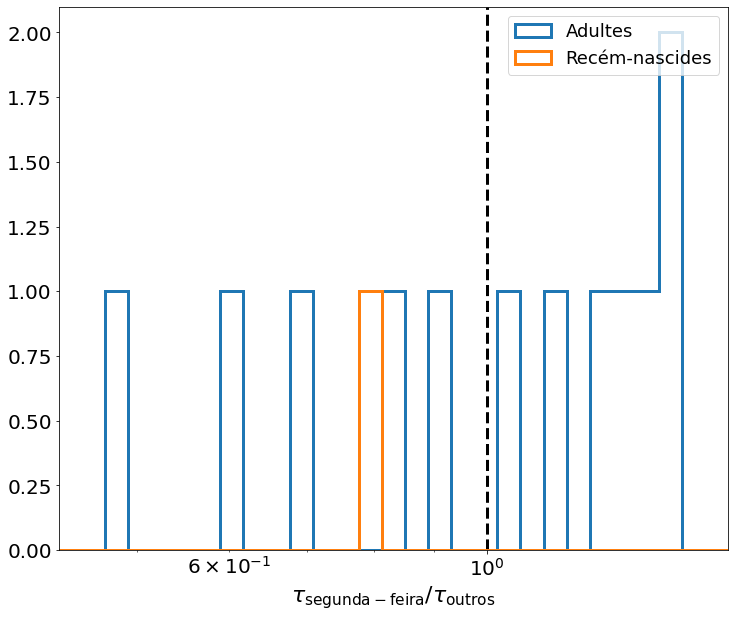

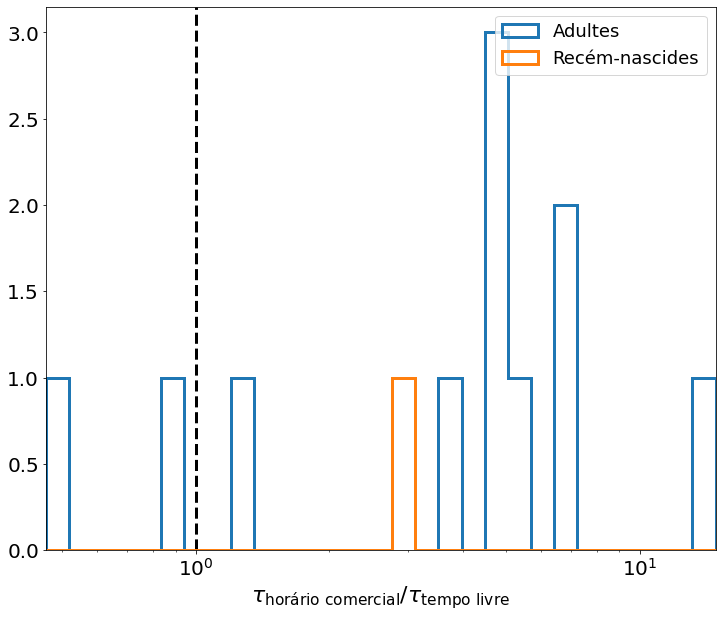

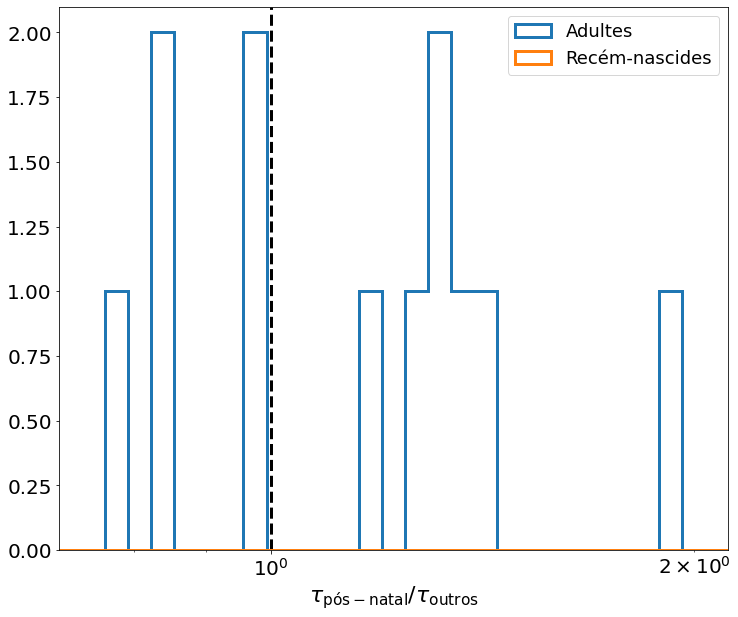

In [51]:
plt.hist(taxaDeCocoNaSegundaFeira[:-1]/taxaDeCocoSemSerNaSegundaFeira[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.logspace(np.log10(np.min(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)/1.1),np.log10(np.max(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)*1.1),30))
plt.hist(taxaDeCocoNaSegundaFeira[-1]/taxaDeCocoSemSerNaSegundaFeira[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.logspace(np.log10(np.min(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)/1.1),np.log10(np.max(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)*1.1),30))
plt.xlabel(r"$\tau_{\rm{segunda-feira}} / \tau_{\rm{outros}}$")
plt.legend()
plt.axvline(x=1,color='black',linestyle='--',zorder=-99)
plt.xlim([(np.min(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)/1.1),(np.max(taxaDeCocoNaSegundaFeira/taxaDeCocoSemSerNaSegundaFeira)*1.1)])
plt.xscale('log')
plt.show()

plt.hist(taxaDeCocoHorarioComercial[:-1]/taxaDeCocoHorarioLivre[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.logspace(np.log10(np.min(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)/1.1),np.log10(np.max(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)*1.1),30))
plt.hist(taxaDeCocoHorarioComercial[-1]/taxaDeCocoHorarioLivre[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.logspace(np.log10(np.min(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)/1.1),np.log10(np.max(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)*1.1),30))
plt.xlabel(r"$\tau_{\rm{horário \ comercial}} / \tau_{\rm{tempo \ livre}}$")
plt.legend()
plt.axvline(x=1,color='black',linestyle='--',zorder=-99)
plt.xlim([(np.min(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)/1.1),(np.max(taxaDeCocoHorarioComercial/taxaDeCocoHorarioLivre)*1.1)])
plt.xscale('log')
plt.show()

plt.hist(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.logspace(np.log10(np.min(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])/1.1),np.log10(np.max(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])*1.1),30))
plt.hist(taxaDeCocoNatal[-1]/taxaDeCocoSemSerNatal[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.logspace(np.log10(np.min(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])/1.1),np.log10(np.max(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])*1.1),30))
plt.xlabel(r"$\tau_{\rm{pós-natal}} / \tau_{\rm{outros}}$")
plt.legend()
plt.axvline(x=1,color='black',linestyle='--',zorder=-99)
plt.xlim([(np.min(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])/1.1),(np.max(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])*1.1)])
plt.xscale('log')
plt.show()


## Parceires

In [52]:
cocosAoMesmoTempo = []
cocosAoMesmoTempoSemCaique = []
maximoCocoAoMesmoTempo = []
maximoCocoAoMesmoTempoNome = []

for nome1 in labelNomes:
    array = []
    if (nome1 != "Caïque"):
        arraySemCaique = []
    array1 = np.array(dataFrameIndividual[nome1]['date'])
    maximo = 0
    for nome2 in labelNomes:
        if (nome1 == nome2):
            array.append( 0 )
            if (nome1 != 'Caïque'):
                arraySemCaique.append( 0 )
            continue
        array2 = np.array(dataFrameIndividual[nome2]['date'])
        total = 0
        for i in array1:
            horario1 = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
            for j in array2:
                horario2 = datetime.strptime(j[2:],'%y-%m-%d %H:%M:%S')
                if horario2 > horario1:
                    horario1_new = horario2
                    horario2_new = horario1
                else:
                    horario1_new = horario1
                    horario2_new = horario2
                if (horario1_new-horario2_new).seconds < 60*5 and (horario1_new-horario2_new).days == 0: # 5 min definem uma cagada simultânea                
                    total +=1
        array.append( total )
        if (total > maximo and nome2 != 'Caïque'):
            maximo = total
            nomeMaximo = nome2
        if (nome1 != "Caïque" and nome2 != "Caïque"):
            arraySemCaique.append(total)
        

    cocosAoMesmoTempo.append( array )
    maximoCocoAoMesmoTempo.append( maximo )
    maximoCocoAoMesmoTempoNome.append( nomeMaximo )
    if (nome1 != "Caïque"):
        cocosAoMesmoTempoSemCaique.append( arraySemCaique )
cocosAoMesmoTempo = np.array( cocosAoMesmoTempo )
cocosAoMesmoTempoSemCaique = np.array( cocosAoMesmoTempoSemCaique )

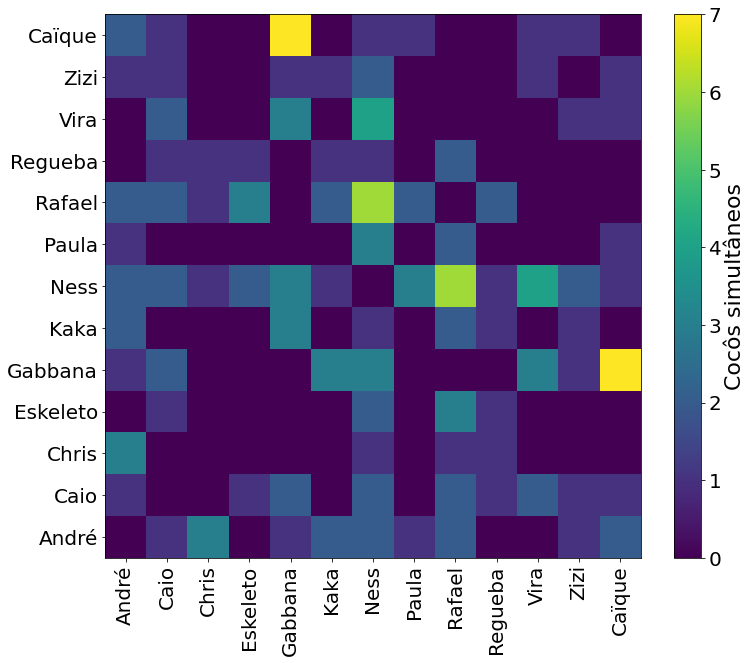

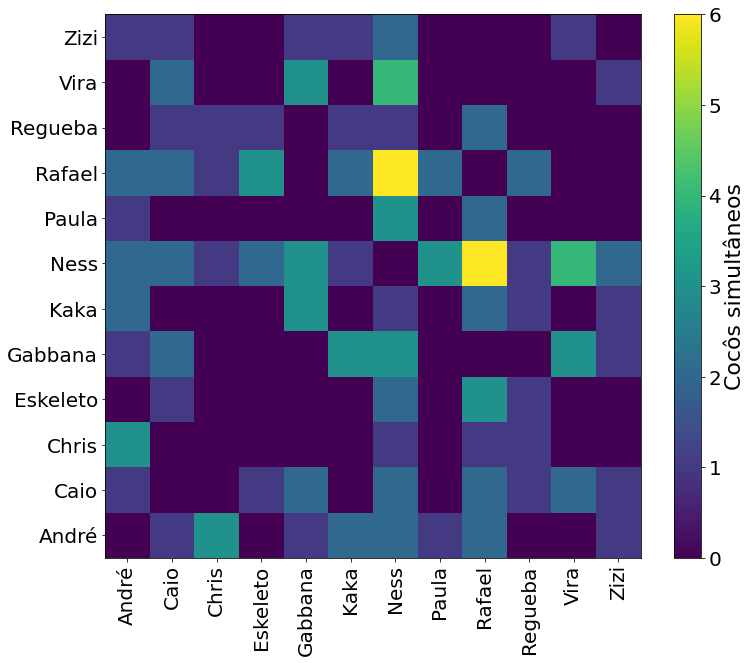

In [53]:
fig, ax = plt.subplots()

plt.pcolormesh(cocosAoMesmoTempo)
c_bar = plt.colorbar()
c_bar.set_label("Cocôs simultâneos")

column_labels = []
for nome in labelNomes:
    column_labels.append(nome)
ax.set_xticks(np.arange(cocosAoMesmoTempo.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(column_labels, minor=False,rotation=90)
ax.set_yticks(np.arange(cocosAoMesmoTempo.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(column_labels, minor=False)

plt.show()

fig, ax = plt.subplots()

plt.pcolormesh(cocosAoMesmoTempoSemCaique)
c_bar = plt.colorbar()
c_bar.set_label("Cocôs simultâneos")

column_labels = []
for nome in labelNomes:
    if (nome != 'Caïque'):
        column_labels.append(nome)
ax.set_xticks(np.arange(cocosAoMesmoTempoSemCaique.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(column_labels, minor=False,rotation=90)
ax.set_yticks(np.arange(cocosAoMesmoTempoSemCaique.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(column_labels, minor=False)


plt.show()

## Distância média

In [54]:
distanciaMedia = []
menorDistanciaMedia = []
menorDistanciaMediaNome = []

for nome1 in labelNomes:
    array = []
    array1 = np.array(dataFrameIndividual[nome1]['date'])
    minimo = 1e10
    for nome2 in labelNomes:
        array2 = np.array(dataFrameIndividual[nome2]['date'])
        total1 = 0
        total2 = 0
        i1 = 0
        i2 = 0
        totalDiferenca = 0
        totalDeltat = 0
        t = datetime.strptime('23-12-01 00:00:00','%y-%m-%d %H:%M:%S')
        while (i1 < len(array1) or i2 < len(array2)):
            if i1 < len(array1):
                horario1 = datetime.strptime(array1[i1][2:],'%y-%m-%d %H:%M:%S')
            else:
                horario1 = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
            if i2 < len(array2):
                horario2 = datetime.strptime(array2[i2][2:],'%y-%m-%d %H:%M:%S')
            else:
                horario2 = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
            if (horario1 < horario2):
                deltat = (horario1 - t).seconds + (horario1 - t).days*24*3600
                totalDeltat += deltat
                totalDiferenca += deltat * (total1 - total2)
                total1 += 1
                i1 += 1
                t = horario1
            else:
                deltat = (horario2 - t).seconds + (horario2 - t).days*24*3600
                totalDeltat += deltat
                totalDiferenca += deltat * (total1 - total2)
                total2 += 1
                i2 += 1
                t = horario2
        tf = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
        deltat = (tf - t).seconds + (tf - t).days*24*3600
        totalDeltat += deltat
        totalDiferenca += deltat * (total1 - total2)

        if abs(totalDiferenca/totalDeltat) < abs(minimo) and nome2 != nome1 and nome2 != "Caïque":
            minimo = totalDiferenca/totalDeltat
            nomeMinimo = nome2
        array.append(totalDiferenca/totalDeltat)
    menorDistanciaMedia.append(minimo)
    menorDistanciaMediaNome.append(nomeMinimo)

    distanciaMedia.append(array)
    
distanciaMedia = np.array(distanciaMedia)

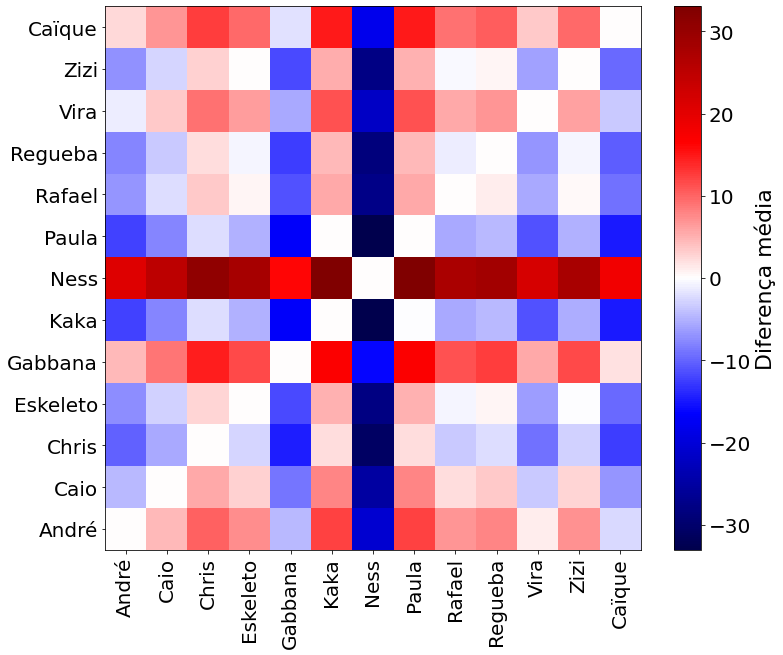

In [55]:
fig, ax = plt.subplots()

cmap = plt.get_cmap('seismic')

plt.pcolormesh(distanciaMedia,cmap=cmap)
c_bar = plt.colorbar(cmap=cmap)
c_bar.set_label("Diferença média")
column_labels = []
for nome in labelNomes:
    column_labels.append(nome)
ax.set_xticks(np.arange(distanciaMedia.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(column_labels, minor=False,rotation=90)
ax.set_yticks(np.arange(distanciaMedia.shape[1]) + 0.5, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

## Variância

$\frac{1}{\sqrt{N}} \sqrt{\sum_i N_i \sigma_i^2}, \  \rm{for \, } N_i > 1$

In [56]:
variancia = []

for nome in labelNomes:
    distribution = []
    array = np.array(dataFrameIndividual[nome]['local-date'])
    j = 0 
    horario = datetime.strptime(array[j][2:],'%y-%m-%d %H:%M:%S')
    for i in range(31):
        k = 0
        while (horario.day <= i+1):
            if (len(distribution) <= k):
                distribution.append([])
            distribution[k].append( horario.hour * 3600 + horario.minute * 60 + horario.second )
            j+=1
            k+=1
            if (j < len(array)):
                horario = datetime.strptime(array[j][2:],'%y-%m-%d %H:%M:%S')
            else:
                break
    total = 0
    totalN = 0
    for i in range(len(distribution)):
        if (len(distribution[i]) > 1):
            total += len(distribution[i]) * np.power(np.std(distribution[i]),2)
            totalN += len(distribution[i])
    total = np.sqrt(total)/np.sqrt(totalN)
    
    variancia.append( total / 3600 )
variancia = np.array(variancia)

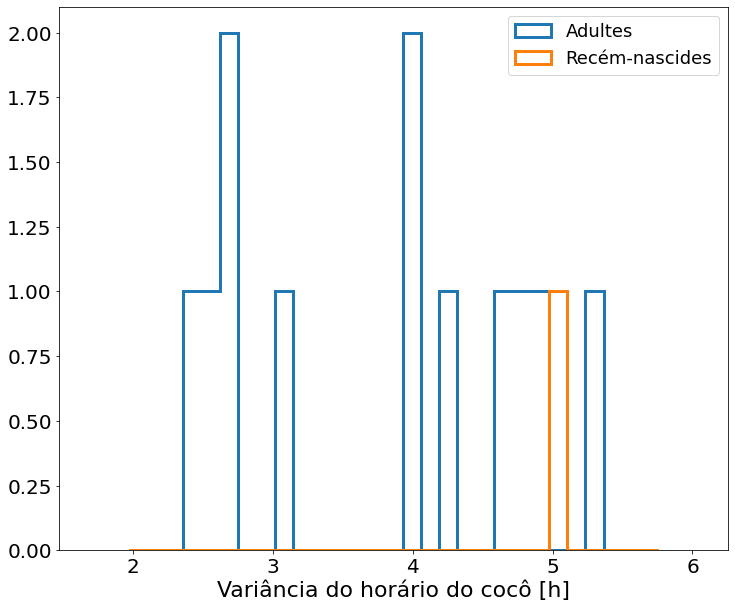

In [57]:
plt.hist(variancia[:-1],histtype='step',linewidth=3,label="Adultes",bins=np.linspace(np.min(variancia)-0.5,np.max(variancia)+0.5,30))
plt.hist(variancia[-1],histtype='step',linewidth=3,label="Recém-nascides",bins=np.linspace(np.min(variancia)-0.5,np.max(variancia)+0.5,30))
plt.xlabel("Variância do horário do cocô [h]")
plt.legend()
plt.xlim([np.min(variancia)-1.,np.max(variancia)+1.])
#plt.xscale('log')
plt.show()

# Plot do ranking

In [58]:
def plotRanking(variavel,nomevariavel,nomearquivo,crescente=True,log=False,minimo=None,extralabel=None,negativo=False,semCaique=False,especial=False):

    if (not semCaique and not especial):
        nomes = []
        ticks = []
        for nome in labelNomes:
            nomes.append(nome)
        for i in range(len(variavel)-1):
            ticks.append(f"{len(variavel)-1 - i}º")
        Y = np.arange(1,len(nomes)+1)
    
    else:
        variavel = variavel[:-1]
        if (extralabel != None):
            extralabel = extralabel[:-1]
        nomes = []
        ticks = []
        for nome in labelNomes:
            if (nome != "Caïque"):
                nomes.append(nome)
        for i in range(len(variavel)):
            ticks.append(f"{len(variavel) - i}º")
        Y = np.arange(1,len(nomes)+1)
        
    nomes=np.array(nomes)
    variavel=np.array(variavel)
    Y = np.array(Y)
    #if (extralabel != None):
    #    extralabel = np.array(extralabel)
      
    for i in range(len(variavel)):
        for j in range(i+1,len(variavel)):
            if (not negativo):
                if (crescente and variavel[i] > variavel[j]) or (not crescente and variavel[i] < variavel[j]):
                    variavel[i],variavel[j] = variavel[j],variavel[i]
                    nomes[i],nomes[j] = nomes[j],nomes[i]
                    if (extralabel != None):
                        extralabel[i],extralabel[j] = extralabel[j],extralabel[i]
            else:
                if (crescente and abs(variavel[i]) > abs(variavel[j])) or (not crescente and abs(variavel[i]) < abs(variavel[j])):
                    variavel[i],variavel[j] = variavel[j],variavel[i]
                    nomes[i],nomes[j] = nomes[j],nomes[i]
                    if (extralabel != None):
                        extralabel[i],extralabel[j] = extralabel[j],extralabel[i]

    nomes=np.array(nomes)
    variavel=np.array(variavel)
    Y = np.array(Y)
   
    fig, ax = plt.subplots()

    #if (negativo):
    #    my_cmap = plt.get_cmap("seismic")
    #else:
    my_cmap = plt.get_cmap("cool")

    if (crescente):
        if (not log):
            rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
        else:
            rescale = lambda y: (np.log10(y) - np.log10(np.min(y))) / (np.log10(np.max(y)) - np.log10(np.min(y)))
    else:
        if (not log):
            rescale = lambda y: (y - np.max(y)) / (np.min(y) - np.max(y))
        else:
            rescale = lambda y: (np.log10(y) - np.log10(np.max(y))) / (np.log10(np.min(y)) - np.log10(np.max(y)))
            
    if (not semCaique and not especial):
        plt.barh(Y[nomes != 'Caïque'],variavel[nomes != 'Caïque'],label='Adultes',color=my_cmap(rescale(variavel[nomes != 'Caïque'])))
        plt.barh(Y[nomes == 'Caïque'],variavel[nomes == 'Caïque'],label='Recém-nascides',color='black')
    else:
        plt.barh(Y,variavel,label='Adultes',color=my_cmap(rescale(variavel)))
    plt.xlabel(nomevariavel)
    if (log):
        plt.xscale('log')
        delta = np.max(variavel)/np.min(variavel)
    else:
        delta = np.max(variavel)-np.min(variavel)
    if (not log):
        if (minimo == None):
            if (extralabel == None):
                plt.xlim([np.min(variavel)-delta*0.1, np.max(variavel)+delta*0.15])
            else:
                plt.xlim([np.min(variavel)-delta*0.1, np.max(variavel)+delta*0.3])
        else:
            if (extralabel == None):
                plt.xlim([minimo, np.max(variavel)+delta*0.15])
            else:
                plt.xlim([minimo, np.max(variavel)+delta*0.3])
    else:
        if (minimo == None):
            if (extralabel == None):
                plt.xlim([np.min(variavel)/(1 + delta*0.1), np.max(variavel)*(1 + delta*0.1)])
            else:
                plt.xlim([np.min(variavel)/(1 + delta*0.1), np.max(variavel)*(1 + delta*0.5)])
        else:
            if (extralabel == None):
                plt.xlim([minimo, np.max(variavel)*(1 + delta*0.1)])
            else:
                plt.xlim([minimo, np.max(variavel)*(1 + delta*0.5)])

        #if (crescente):
    #    plt.legend(loc='lower right')
    #else:
    #    plt.legend(loc='upper right')
    
    if (not semCaique and not especial):
        ax.set_yticks(Y[nomes != 'Caïque'], minor=False)
        ax.set_yticklabels(ticks, minor=False)
    else:
        ax.set_yticks(Y, minor=False)
        ax.set_yticklabels(ticks, minor=False)
    
    plt.ylim([np.min(Y)-0.8,np.max(Y)+0.8])

    for i in range(len(nomes)):
        y = Y[i]
        if (not log):
            if (negativo and variavel[i] < 0):
                x = 0+delta*1e-2
            else:
                x = variavel[i]+delta*1e-2
        else:
            x = variavel[i]* (1 + 1e-3*delta)
        if (extralabel != None):
            plt.text(x,y,f"{nomes[i]} ({extralabel[i]})",va='center',ha='left',size=15)
        else:
            plt.text(x,y,nomes[i],va='center',ha='left',size=15)
    
    plt.savefig(f"Graphs/Ranking-{nomearquivo}.pdf")
    plt.savefig(f"Graphs/Ranking-{nomearquivo}.png")
    plt.show()

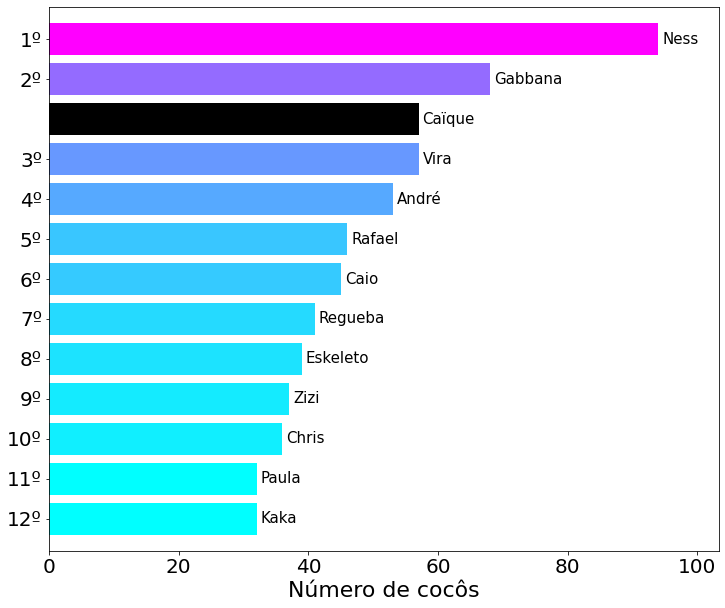

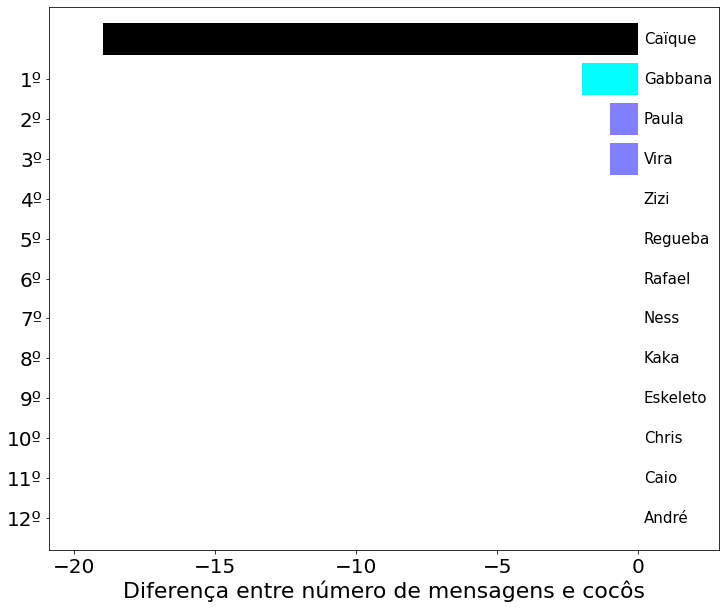

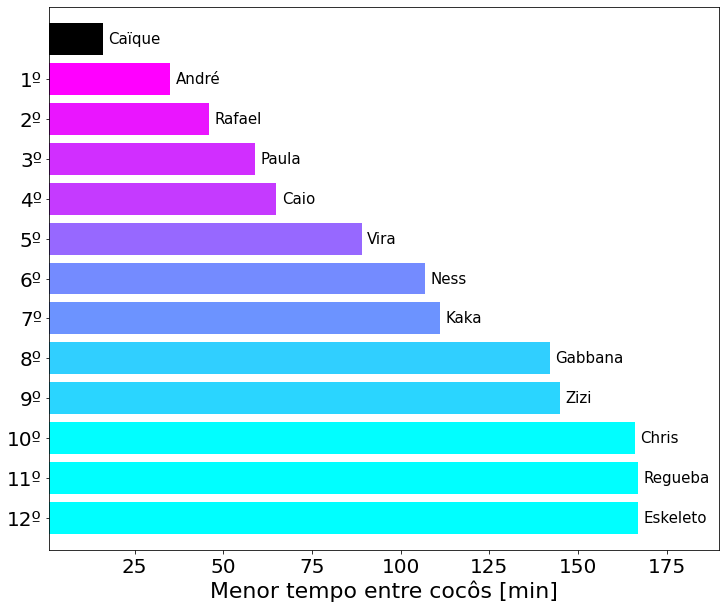

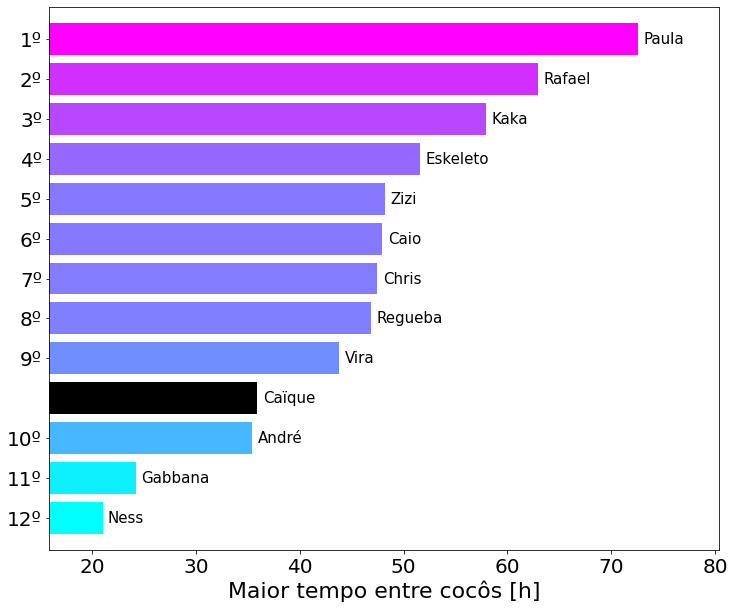

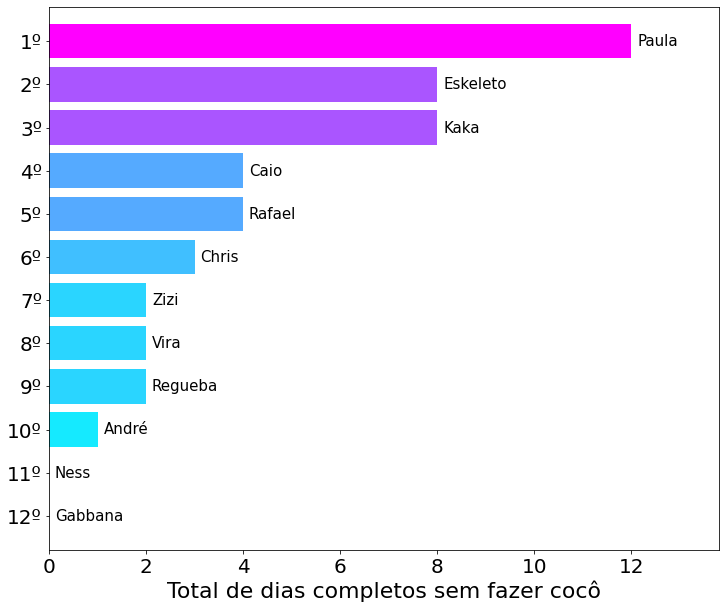

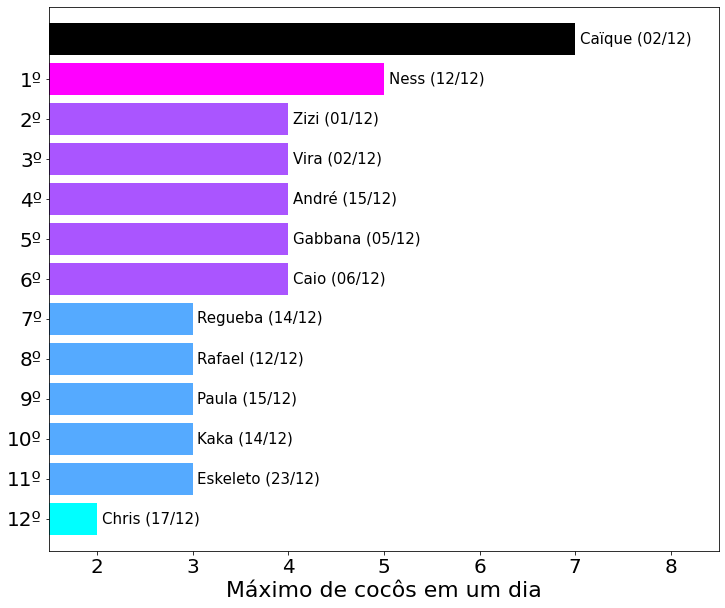

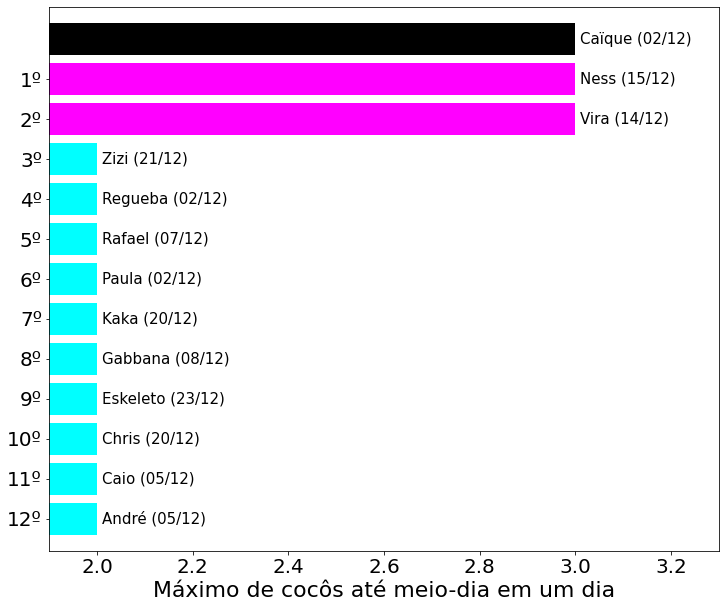

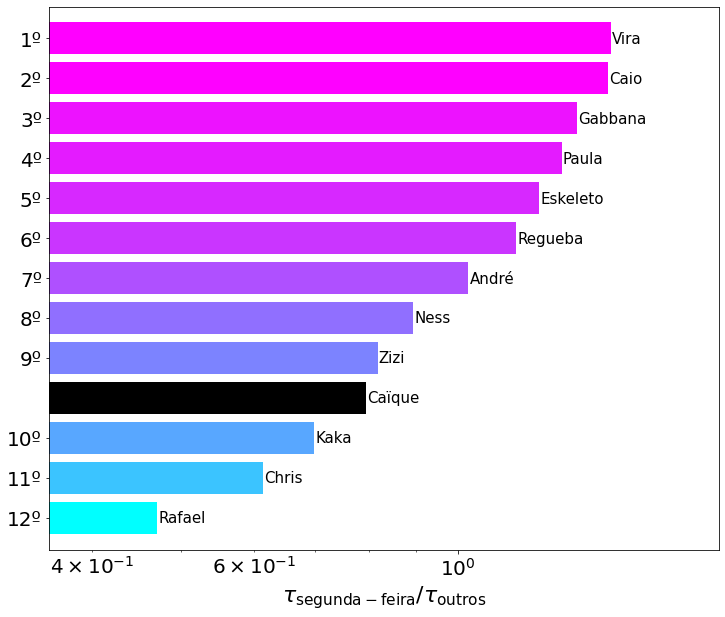

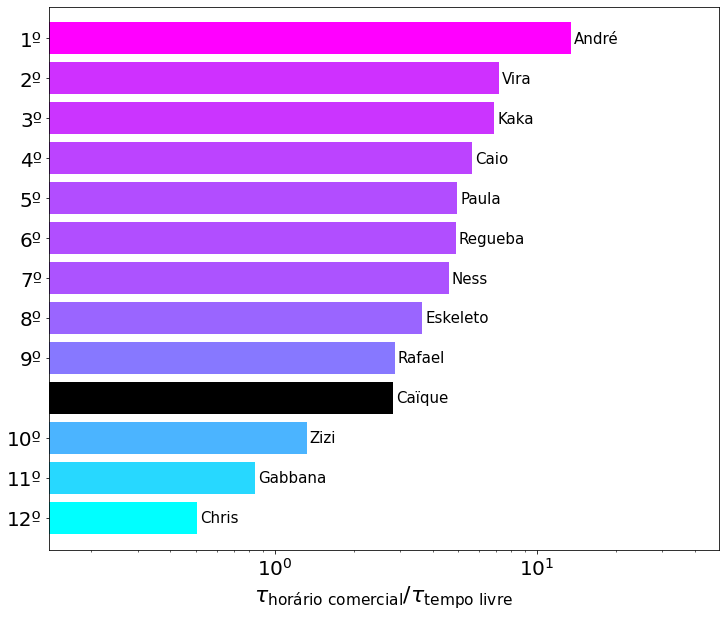

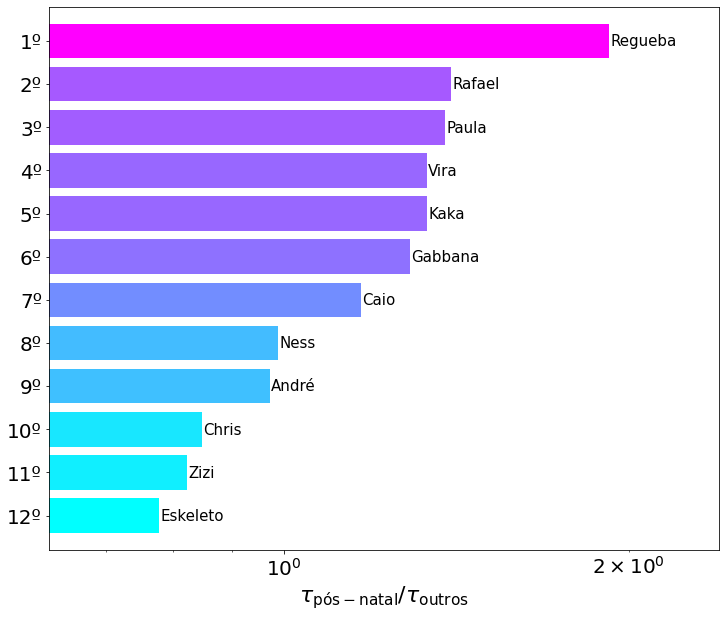

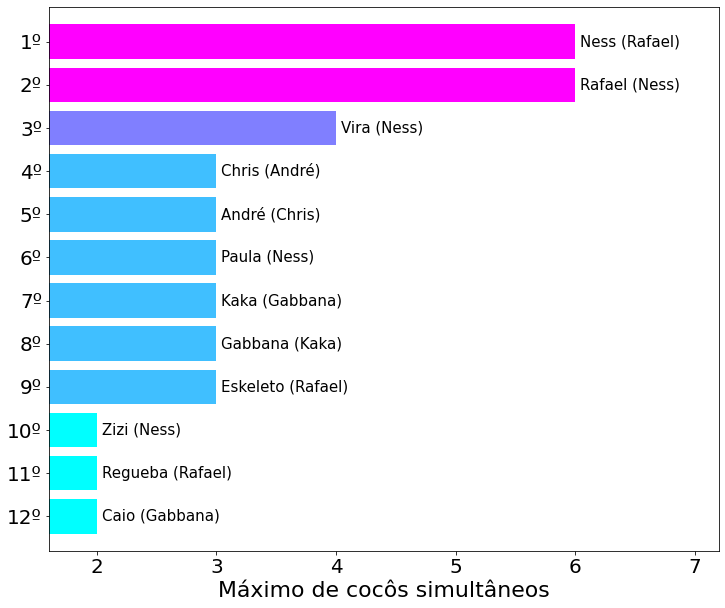

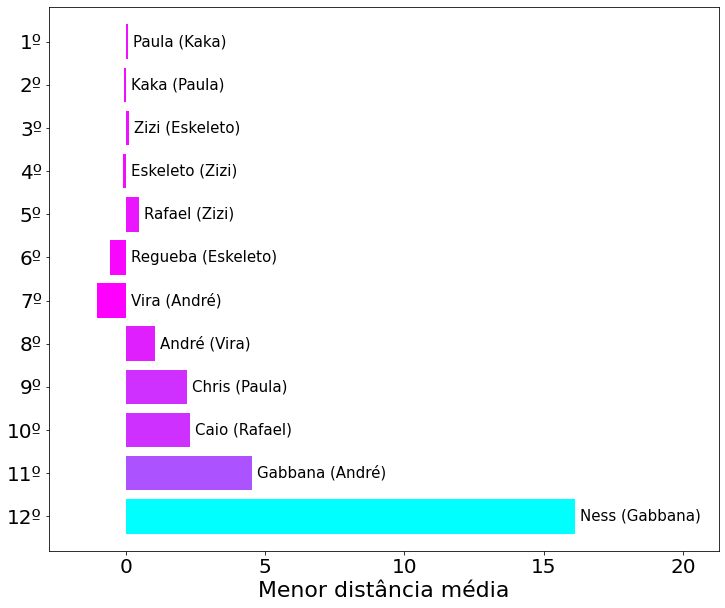

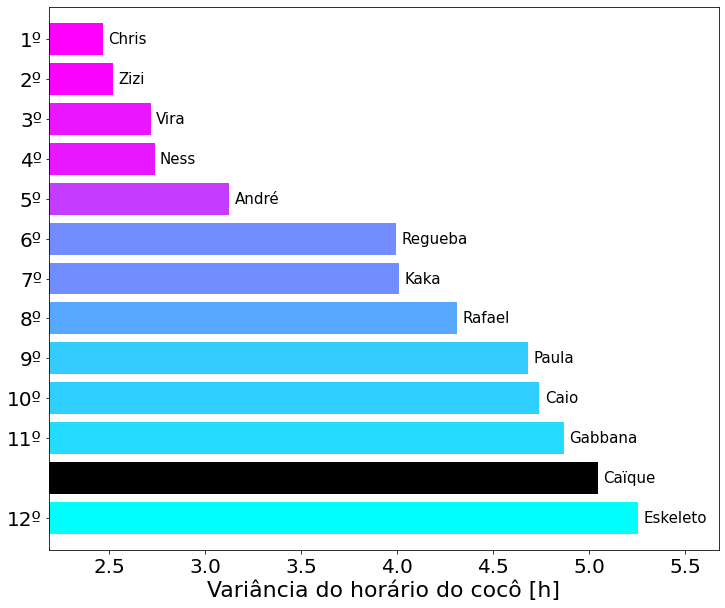

In [97]:
plotRanking(totalDeCocos,"Número de cocôs","total",minimo=0)
plotRanking(diferencaEntreMensagensECocos,"Diferença entre número de mensagens e cocôs","diferenca",negativo=True)
plotRanking(menorTempoEntreCocos,"Menor tempo entre cocôs [min]","menortempo",crescente=False)
plotRanking(maiorTempoEntreCocos,"Maior tempo entre cocôs [h]","maiortempo",crescente=True)
plotRanking(totalDeDiasSemCoco,"Total de dias completos sem fazer cocô","totaldedias",crescente=True,semCaique=True,minimo=0)
plotRanking(maximoDeCocosEmUmDia,"Máximo de cocôs em um dia","maximopordia",crescente=True,extralabel=diaDoMaximo)
plotRanking(maximoDeCocosAteMeioDia,"Máximo de cocôs até meio-dia em um dia","maximomeiodia",crescente=True,extralabel=diaDoMaximoAteMeioDia)
plotRanking(np.array(taxaDeCocoNaSegundaFeira)/np.array(taxaDeCocoSemSerNaSegundaFeira),r"$\tau_{\rm{segunda-feira}}/\tau_{\rm{outros}}$","segundafeira",log=True)
plotRanking(np.array(taxaDeCocoHorarioComercial)/np.array(taxaDeCocoHorarioLivre),r"$\tau_{\rm{horário \ comercial}}/\tau_{\rm{tempo \ livre}}$","horariocomercial",log=True)
plotRanking(np.array(taxaDeCocoNatal)/np.array(taxaDeCocoSemSerNatal),r"$\tau_{\rm{pós-natal}}/\tau_{\rm{outros}}$","natal",log=True,semCaique=True)
plotRanking(maximoCocoAoMesmoTempo,"Máximo de cocôs simultâneos","parceire",extralabel=maximoCocoAoMesmoTempoNome,semCaique=True)
plotRanking(menorDistanciaMedia,"Menor distância média","distancia",extralabel=menorDistanciaMediaNome,negativo=True,semCaique=True,crescente=False)
plotRanking(variancia,"Variância do horário do cocô [h]","variancia",crescente=False)


# Variáveis a serem lidas

In [72]:
totalDeCocos
diferencaEntreMensagensECocos
menorTempoEntreCocos
maiorTempoEntreCocos
totalDeDiasSemCoco
maximoDeCocosEmUmDia
maximoDeCocosAteMeioDia
diaDoMaximo
diaDoMaximoAteMeioDia
taxaDeCocoNaSegundaFeira
taxaDeCocoSemSerNaSegundaFeira
taxaDeCocoHorarioComercial
taxaDeCocoHorarioLivre
taxaDeCocoNatal
taxaDeCocoSemSerNatal
cocosAoMesmoTempo
cocosAoMesmoTempoSemCaique
maximoCocoAoMesmoTempo
maximoCocoAoMesmoTempoNome
distanciaMedia
menorDistanciaMedia
menorDistanciaMediaNome
varianca

# Gráficos individuais

In [117]:
def getPosicoesOrdenadas(array,crescente=False):
    
    array_com_posicoes = [(elemento, posicao) for posicao, elemento in enumerate(array)]
    if (crescente):
        array_ordenada_com_posicoes = sorted(array_com_posicoes, key=lambda x: x[0])
    else:
        array_ordenada_com_posicoes = sorted(array_com_posicoes, key=lambda x: x[0],reverse=True)
    posicoes_ordenadas=[]
    for i in range(len(array_ordenada_com_posicoes)):
        for j in range(len(array_ordenada_com_posicoes)):
            if (array_ordenada_com_posicoes[j][1] == i):
                k = j-1
                while (k>0):
                    if (array_ordenada_com_posicoes[k][0] == array_ordenada_com_posicoes[j][0]):
                        k+=-1
                    else:
                        break
                k+=1
                posicoes_ordenadas.append(k+1)
                break
    return(posicoes_ordenadas)

In [118]:
def plotPizza(array,nome):

    array = 13-np.array(array)
    N = 12
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False) + np.pi/20. + np.pi/6 *2
    radii = array
    width = []
    rescale = lambda y: (y - np.min(1)) / (np.max(12) - np.min(1))

    for i in range(N):
        width.append(2 * np.pi / (N))
    #colors = []
    my_cmap = plt.get_cmap("RdPu")
    ax = plt.subplot(projection='polar')
    ax.bar(theta, radii, width=width, bottom=0.0,color=my_cmap(rescale(array)))#, #color=colors, alpha=0.5)
    plt.xticks([])
    plt.ylim([0,12])
    ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])
    plt.text(theta[0],8,"DiarRei/DiarRainha",ha='center',va='center',size=20,rotation=theta[0]*180/np.pi)
    plt.text(theta[1],8,"Double Crap",ha='center',va='center',size=20,rotation=theta[1]*180/np.pi)
    plt.text(theta[2],8,"Esqueci de Cagar",ha='center',va='center',size=20,rotation=theta[2]*180/np.pi)
    plt.text(theta[3],8,"Dia Sim Dia Não, Talkei",ha='center',va='center',size=20,rotation=theta[3]*180/np.pi)
    plt.text(theta[4],8,"DIA Réia",ha='center',va='center',size=20,rotation=theta[4]*180/np.pi)
    plt.text(theta[5],8,"Começo de Dia de Merda",ha='center',va='center',size=20,rotation=theta[5]*180/np.pi)
    plt.text(theta[6],8,"Intolerante a Segunda-Feiras",ha='center',va='center',size=20,rotation=theta[6]*180/np.pi)
    plt.text(theta[7],8,"Cagadore Profissional",ha='center',va='center',size=20,rotation=theta[7]*180/np.pi)
    plt.text(theta[8],8,"Orgulho do Papai Noel",ha='center',va='center',size=20,rotation=theta[8]*180/np.pi)
    plt.text(theta[9],8,"Parceires de Trono",ha='center',va='center',size=20,rotation=theta[9]*180/np.pi)
    plt.text(theta[10],8,"Cabeça a Cabeça da Marmota",ha='center',va='center',size=20,rotation=theta[10]*180/np.pi)
    plt.text(theta[11],8,"Relógio de Cuco... Cocô",ha='center',va='center',size=20,rotation=theta[11]*180/np.pi)
    plt.title(nome,size=33)
    plt.savefig(f"Graphs/Pizza-{nome}.pdf",bbox_inches='tight')
    plt.savefig(f"Graphs/Pizza-{nome}.png",bbox_inches='tight')
    plt.show()

In [119]:
def plotHist2D(nome):
    hist = np.zeros((7,4))

    if (nome == "Todos"):
        for nome1 in labelNomes:
            array = np.array(dataFrameIndividual[nome1]['local-date'])
            for i in array:
                t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
                if (t.hour < 6):
                    h = 0
                elif (t.hour < 12):
                    h = 1
                elif (t.hour < 18):
                    h = 2
                else:
                    h = 3
                d = t.weekday()+1
                if (d == 7):
                    d = 0
                if (h == 0 or h == 5 or h == 6):
                    hist[d,h] += 1/5.
                else:
                    hist[d,h] += 1/4.
            
    else:
        array = np.array(dataFrameIndividual[nome]['local-date'])
        for i in array:
            t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
            if (t.hour < 6):
                h = 0
            elif (t.hour < 12):
                h = 1
            elif (t.hour < 18):
                h = 2
            else:
                h = 3
            d = t.weekday()+1
            if (d == 7):
                d = 0
            if (h == 0 or h == 5 or h == 6):
                hist[d,h] += 1/5.
            else:
                hist[d,h] += 1/4.

    fig, ax = plt.subplots()

    cmap = plt.get_cmap('RdPu')

    plt.pcolormesh(hist.T,cmap=cmap)
    c_bar = plt.colorbar(cmap=cmap)
    c_bar.set_label("Média de cocôs")
    column_labels_x = ["DOM", "SEG", "TER", "QUA", "QUI", "SEX", "SAB"]
    column_labels_y = ["0-6h", "6-12h", "12-18h", "18-24h"]
    ax.set_xticks(np.arange(7) + 0.5, minor=False)
    ax.set_xticklabels(column_labels_x, minor=False,rotation=90)
    ax.set_yticks(np.arange(4) + 0.5, minor=False)
    ax.set_yticklabels(column_labels_y, minor=False)
    plt.title(nome,size=30)
    plt.savefig(f"Graphs/Hist2D-{nome}.pdf",bbox_inches='tight')
    plt.savefig(f"Graphs/Hist2D-{nome}.png",bbox_inches='tight')
    plt.show()

In [120]:
def plotClock(nome):
    hora = np.zeros(24)
    
    if (nome == 'Todos'):
        for nome1 in labelNomes:
            array = np.array(dataFrameIndividual[nome1]['local-date'])
            for i in array:
                t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
                hora[t.hour] += 1

    else:
        array = np.array(dataFrameIndividual[nome]['local-date'])
        for i in array:
            t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
            hora[t.hour] += 1

    N = 24
    theta = np.linspace(2 * np.pi, 0, N, endpoint=False) -0.5 * 2*np.pi / 24
    theta = theta+np.pi/2
    for i in range(len(theta)):
        if theta[i] > 2*np.pi:
            theta[i] = theta[i]-2*np.pi
    #theta = np.flip(theta)
    radii = hora
    width = []
    rescale = lambda y: (y - np.min(hora)) / (np.max(hora) - np.min(hora))

    for i in range(N):
        width.append(2 * np.pi / (N))
    #colors = []
    my_cmap = plt.get_cmap("RdPu")
    ax = plt.subplot(projection='polar')
    ax.bar(theta, radii, width=width, bottom=0.0,color=my_cmap(rescale(hora)))#, #color=colors, alpha=0.5)
    #plt.yticks([])
    #plt.ylim([0,12])
    #ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])
    ax.set_yticklabels(["","","","",""])
    plt.xticks([theta[0]+0.5*2*np.pi/24,theta[2]+0.5*2*np.pi/24,theta[4]+0.5*2*np.pi/24,theta[6]+0.5*2*np.pi/24-np.pi*2,theta[8]+0.5*2*np.pi/24,theta[10]+0.5*2*np.pi/24,theta[12]+0.5*2*np.pi/24,theta[14]+0.5*2*np.pi/24,theta[16]+0.5*2*np.pi/24,theta[18]+0.5*2*np.pi/24,theta[20]+0.5*2*np.pi/24,theta[22]+0.5*2*np.pi/24])
    ax.set_xticklabels(["0h","2h","4h","6h","8h","10h","12h","14h","16h","18h","20h","22h"])
    plt.title(nome,size=30)
    plt.savefig(f"Graphs/Clock-{nome}.pdf",bbox_inches='tight')
    plt.savefig(f"Graphs/Clock-{nome}.png",bbox_inches='tight')
    plt.show()

In [121]:
def plotCorrida(nome1):
    cmap = plt.get_cmap('Paired').colors
    c=0
    minimo = 1e10
    maximo = 0
    array = []
    array1 = np.array(dataFrameIndividual[nome1]['date'])
    for nome2 in labelNomes:
        if (nome2 == nome1):
            c+=1
            continue
        tempo=[0]
        distancia=[0]
        array2 = np.array(dataFrameIndividual[nome2]['date'])
        total1 = 0
        total2 = 0
        i1 = 0
        i2 = 0
        t = datetime.strptime('23-12-01 00:00:00','%y-%m-%d %H:%M:%S')
        t0 = datetime.strptime('23-12-01 00:00:00','%y-%m-%d %H:%M:%S')
        while (i1 < len(array1) or i2 < len(array2)):
            if i1 < len(array1):
                horario1 = datetime.strptime(array1[i1][2:],'%y-%m-%d %H:%M:%S')
            else:
                horario1 = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
            if i2 < len(array2):
                horario2 = datetime.strptime(array2[i2][2:],'%y-%m-%d %H:%M:%S')
            else:
                horario2 = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
            if (horario1 < horario2):
                total1 += 1
                i1 += 1
                t = horario1
                tempo.append(((horario1-t0).seconds + (horario1-t0).days*24*3600) / 24 / 3600 )
                distancia.append(total1-total2)
            else:
                total2 += 1
                i2 += 1
                t = horario2
                tempo.append(((horario2-t0).seconds + (horario2-t0).days*24*3600) / 24 / 3600 )
                distancia.append(total1-total2)
            if (total1-total2 < minimo):
                minimo = total1-total2
            if (total1-total2 > maximo):
                maximo = total1-total2
        tf = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
        tempo.append(((tf-t0).seconds + (tf-t0).days*24*3600) / 24 / 3600 )
        distancia.append(total1-total2)
        if (c < 12):
            plt.plot(tempo,distancia,label=nome2,color=cmap[c])
        else:
            plt.plot(tempo,distancia,label=nome2,color='black')
        c+=1
    plt.axhline(y=0,color='black',linestyle='--',zorder=-99,linewidth=1.5)
    plt.ylabel("Diferença")
    plt.xlabel("Dias")
    plt.xlim([0,31])
    plt.ylim([minimo-1,maximo+1])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(nome1)
    plt.savefig(f"Graphs/Corrida-{nome}.pdf",bbox_inches='tight')
    plt.savefig(f"Graphs/Corrida-{nome}.png",bbox_inches='tight')
    plt.show()

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


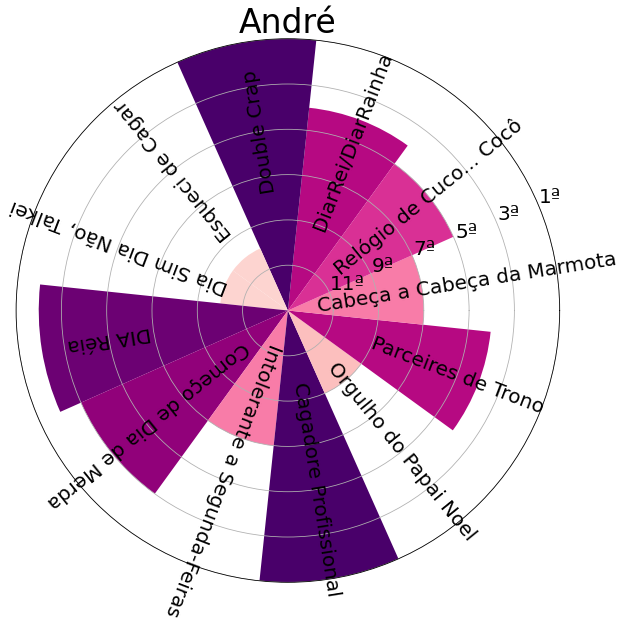

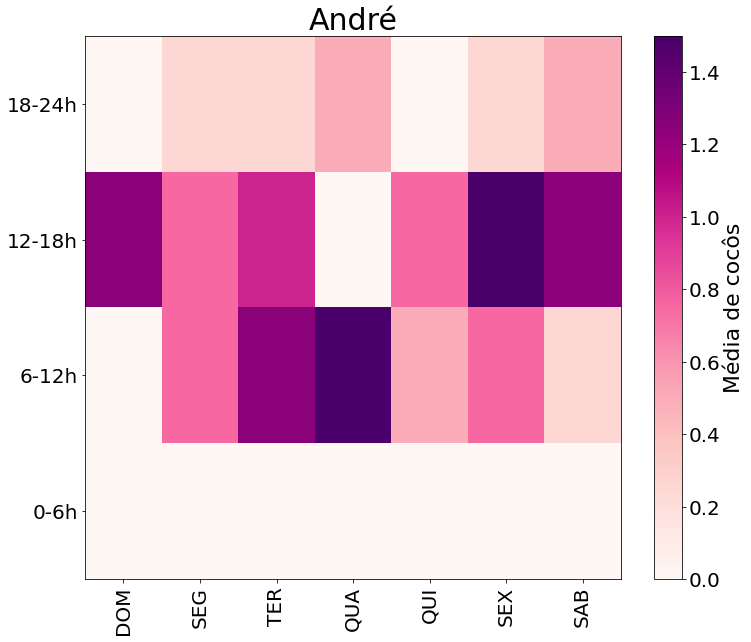

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


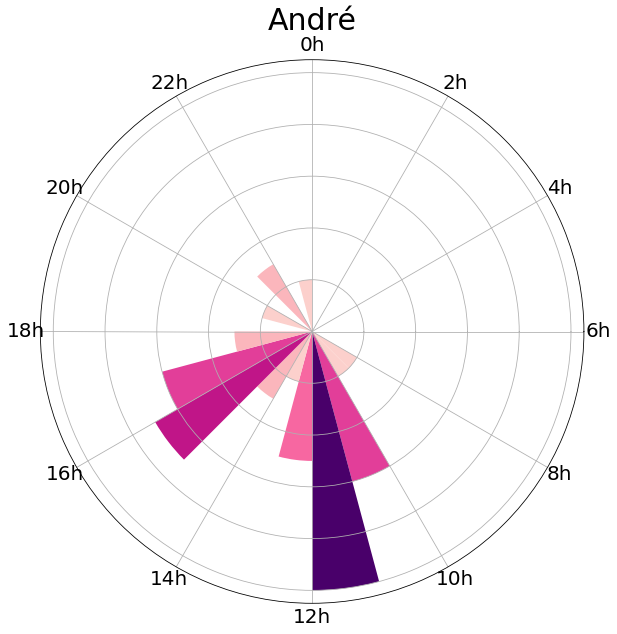

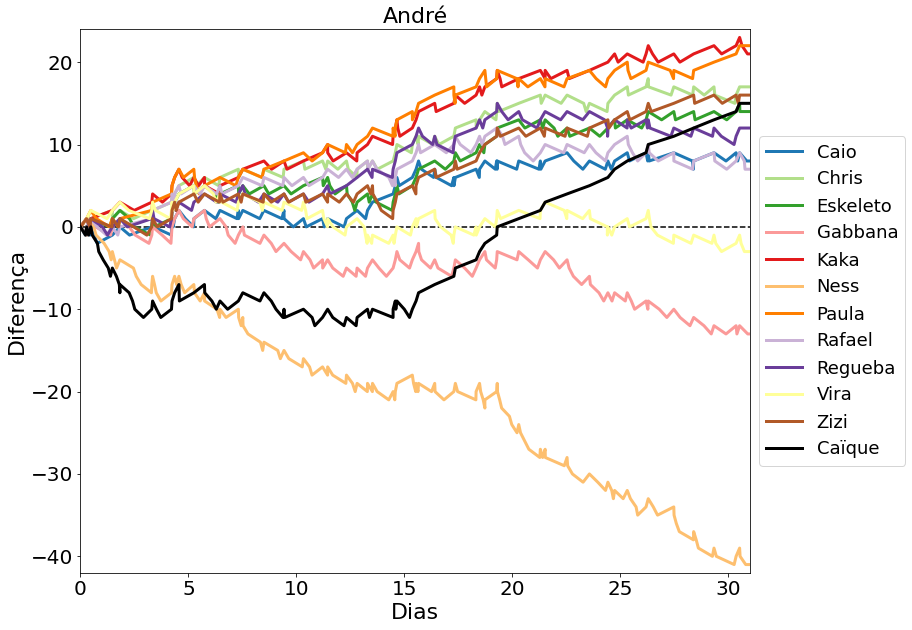

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


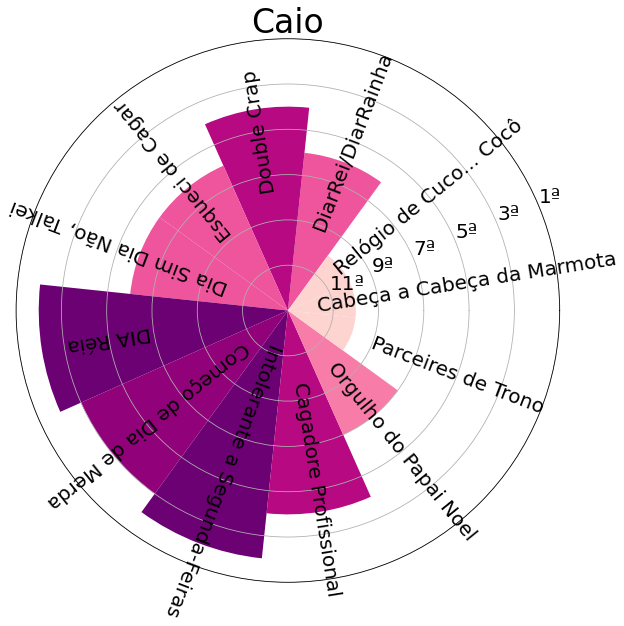

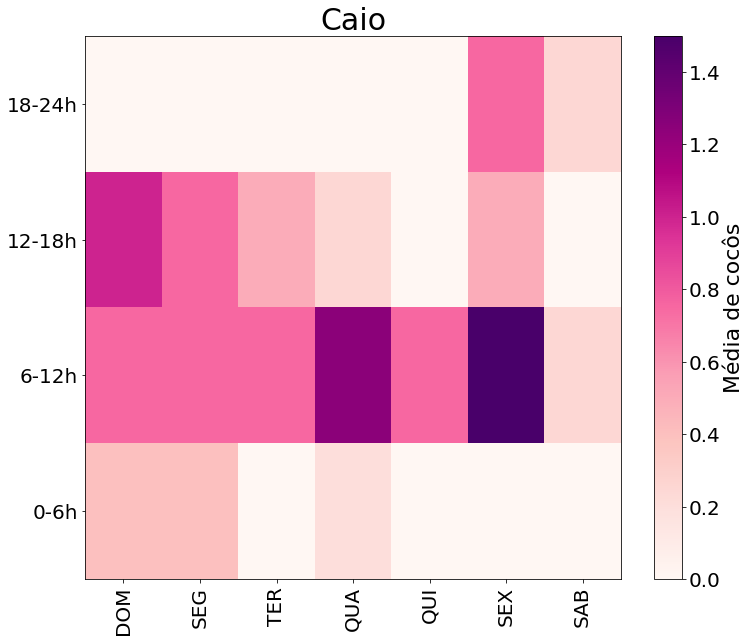

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


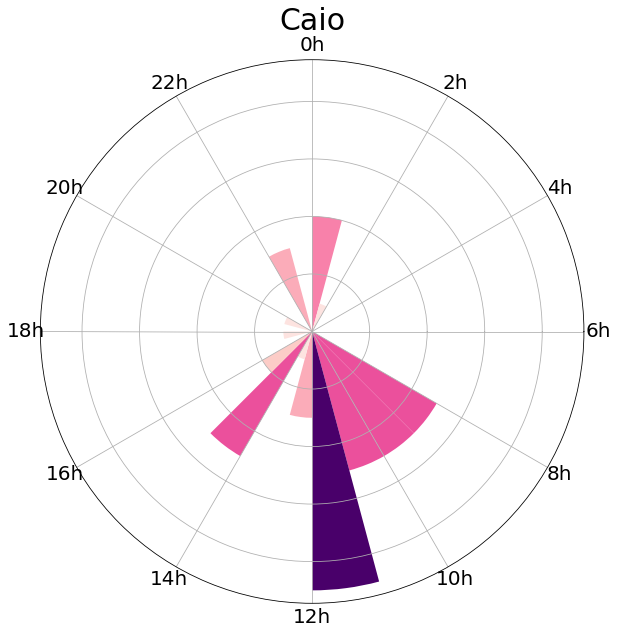

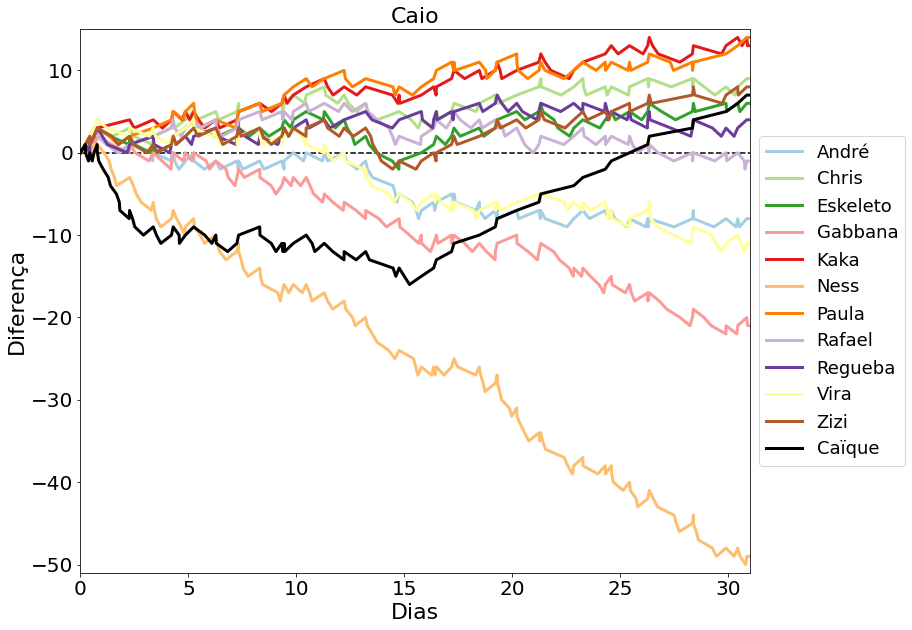

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


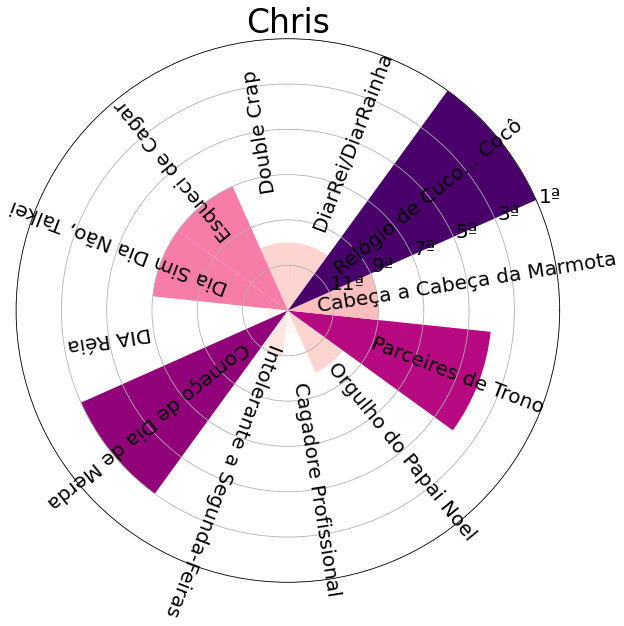

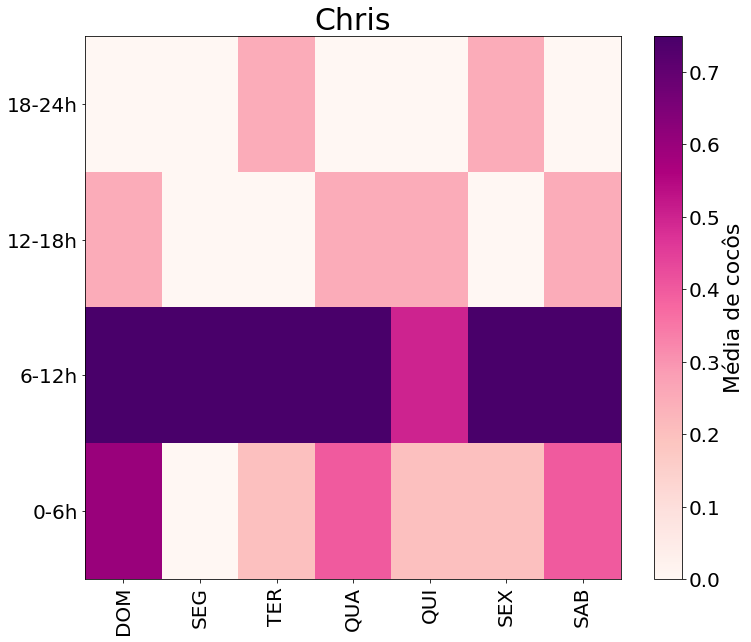

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


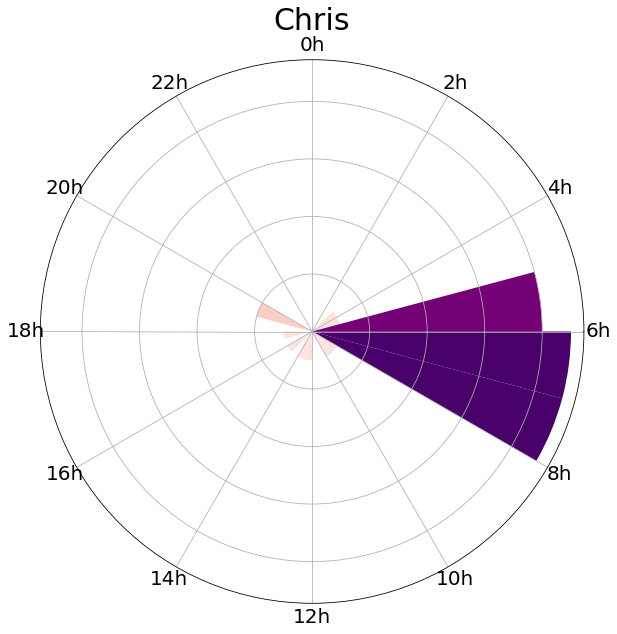

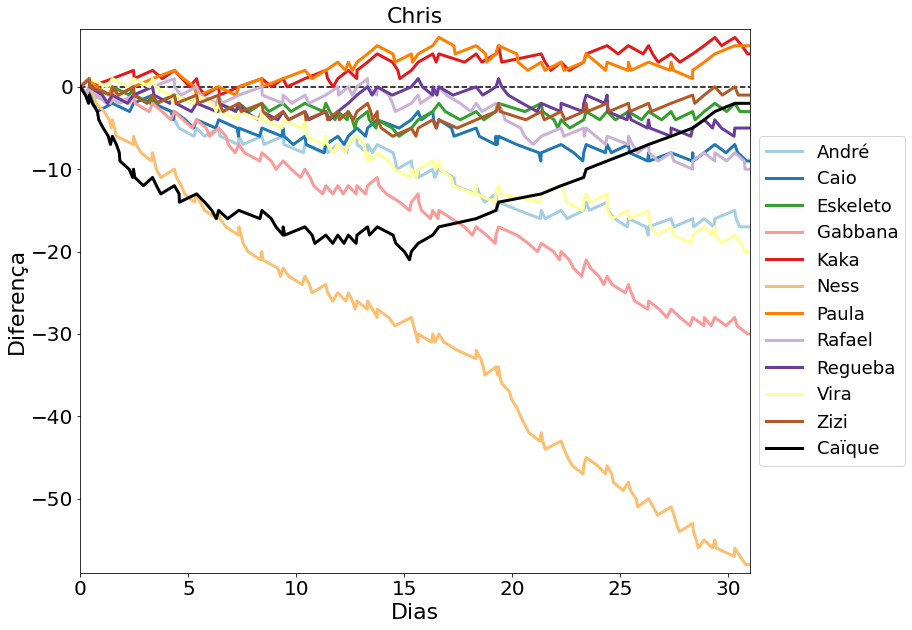

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


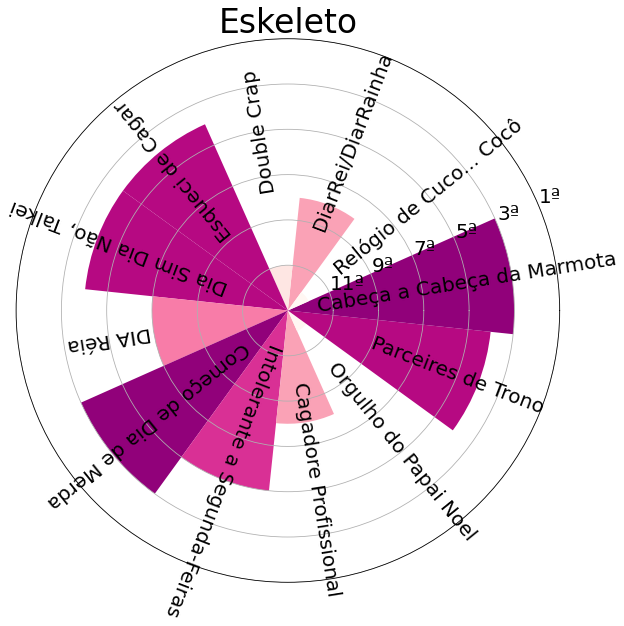

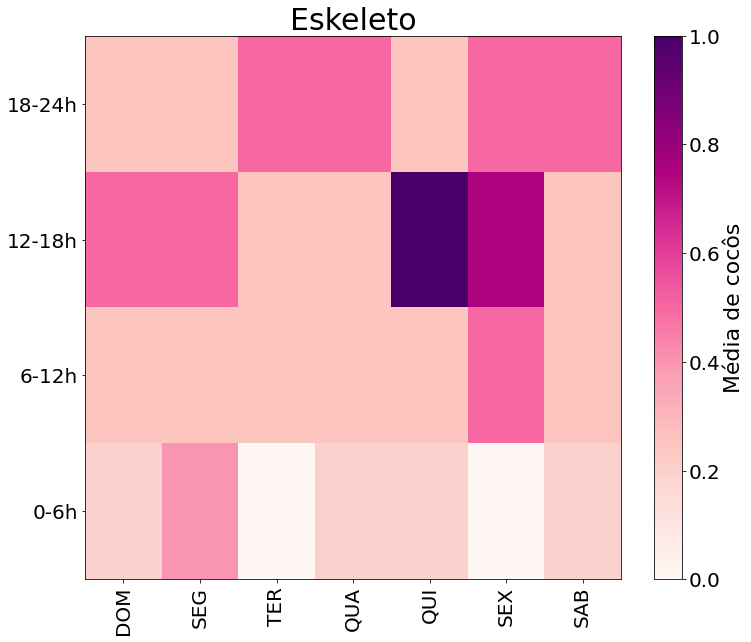

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


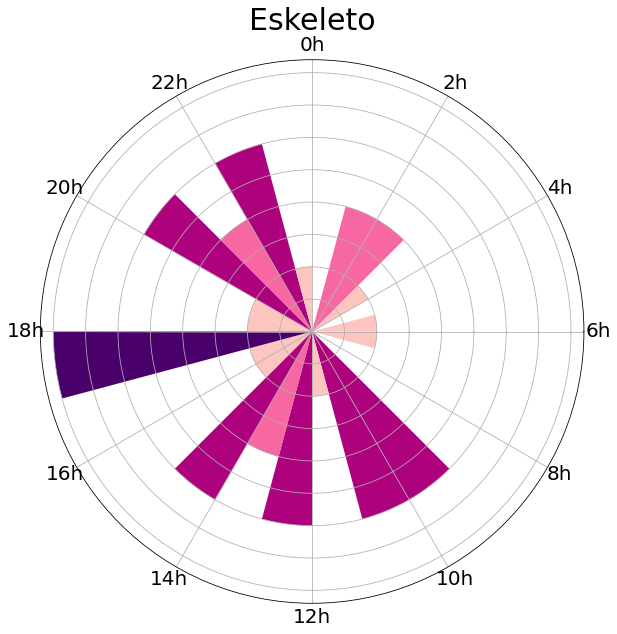

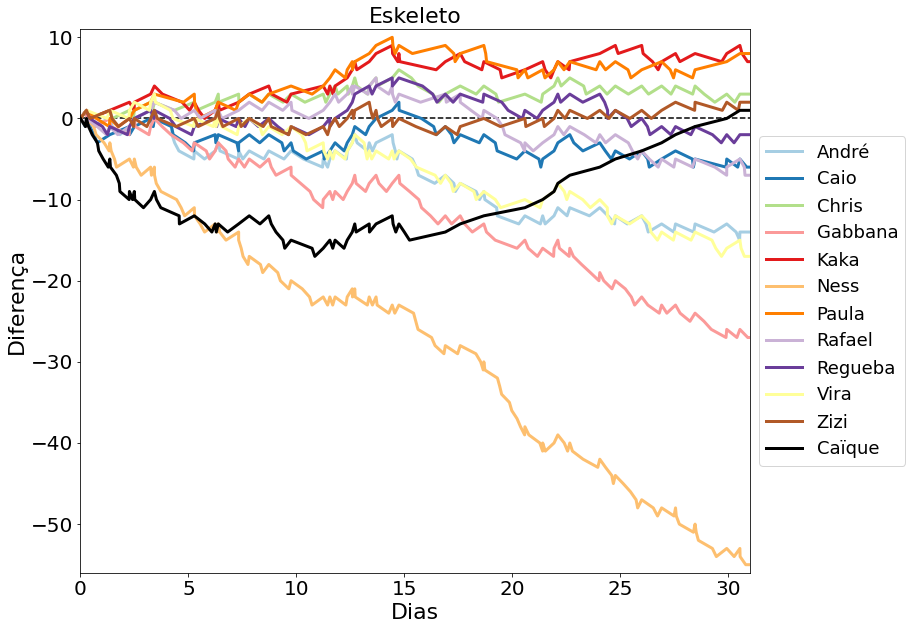

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


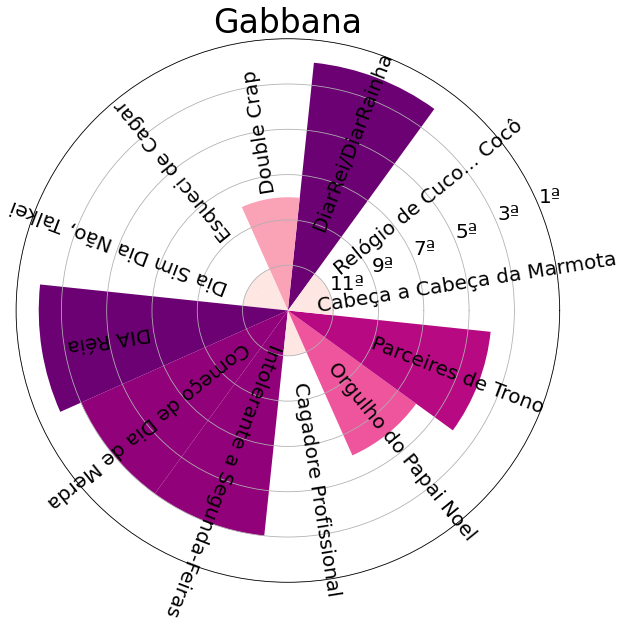

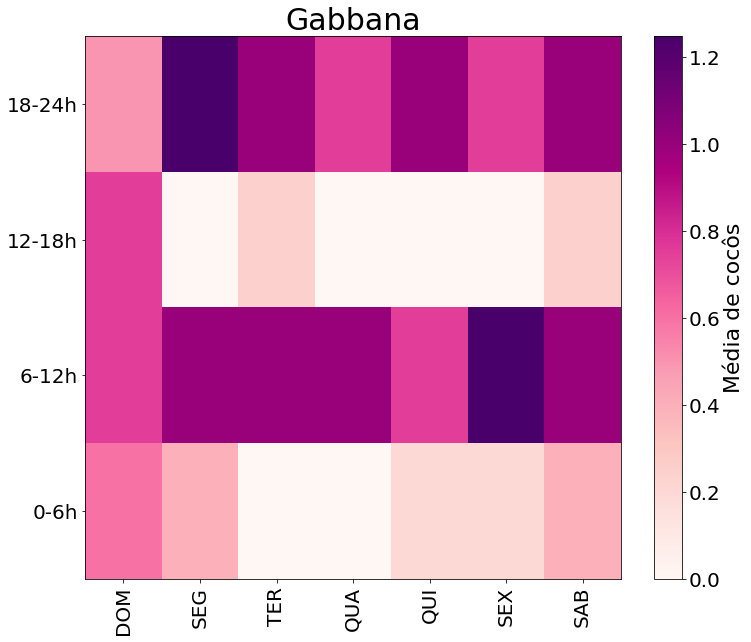

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


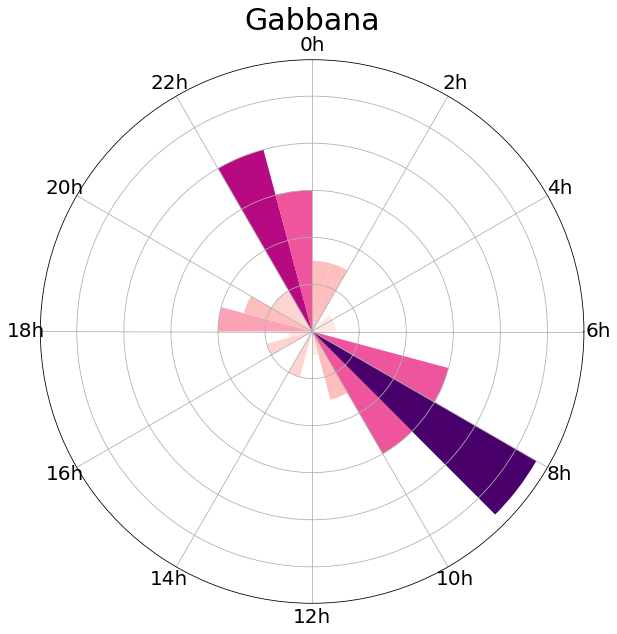

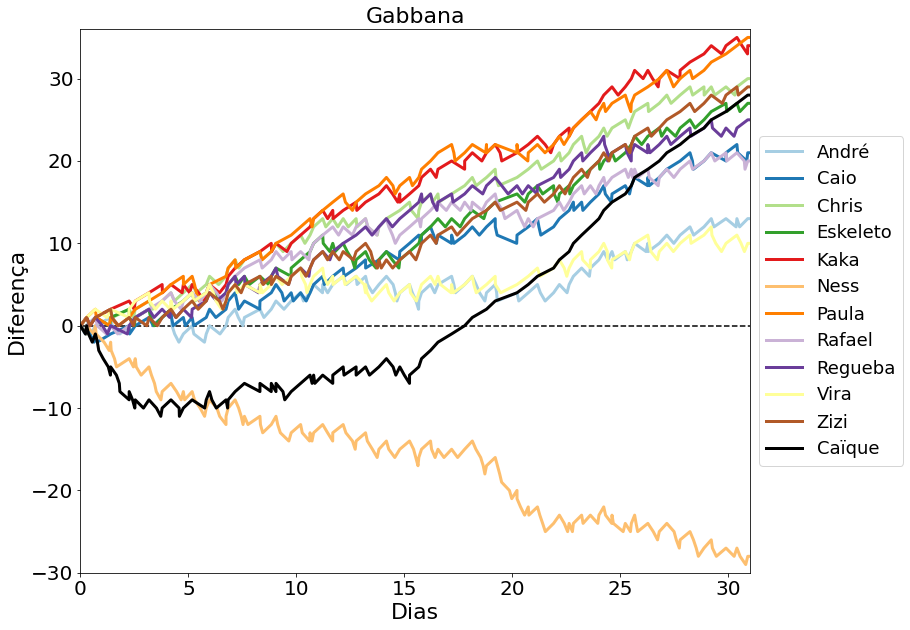

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


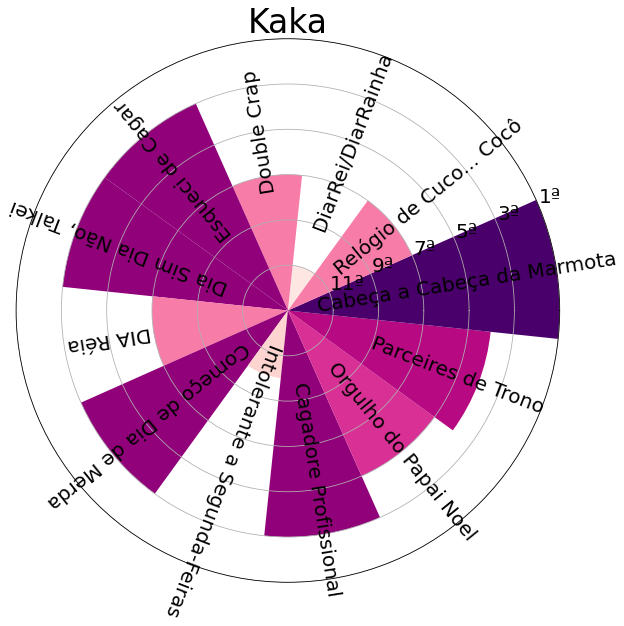

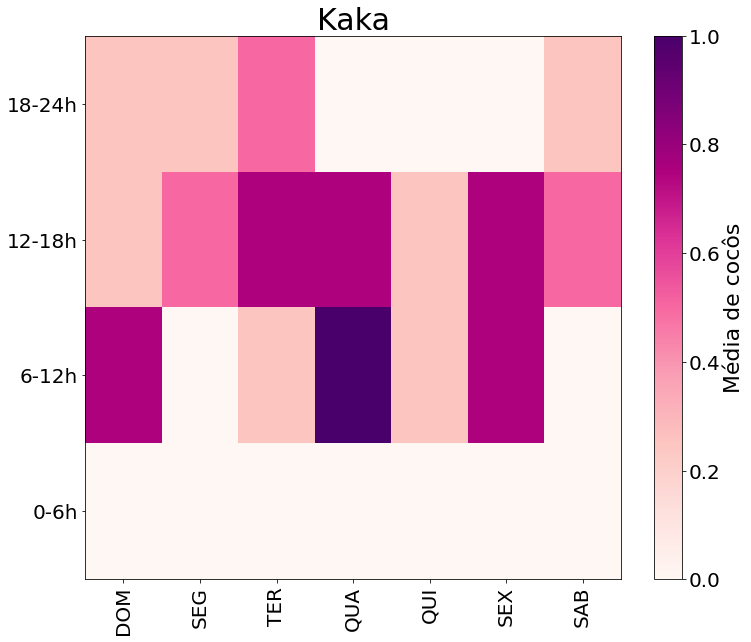

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


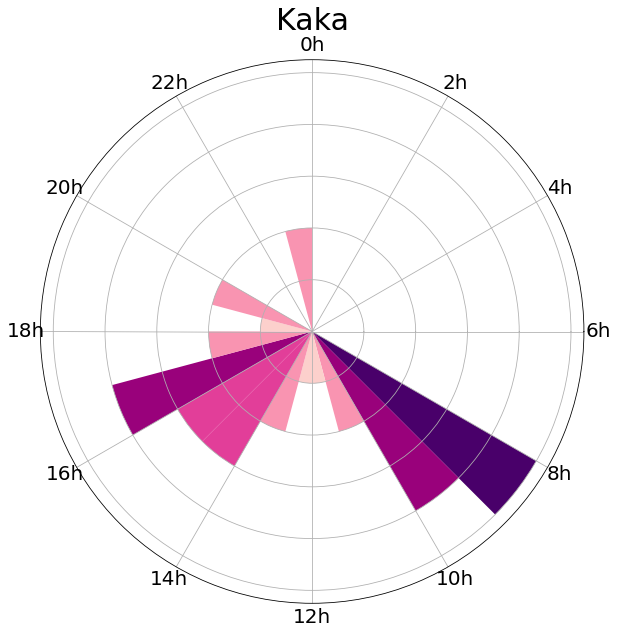

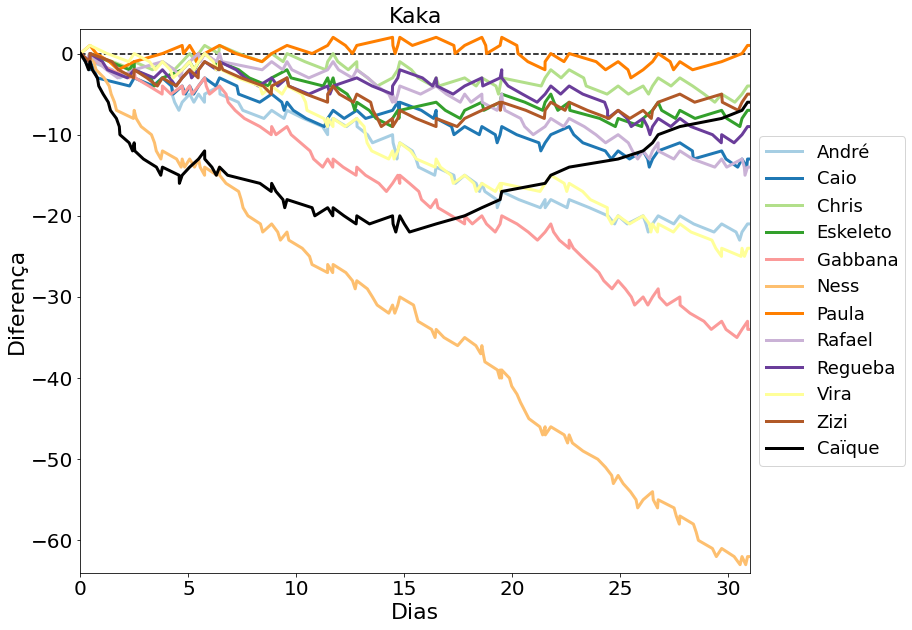

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


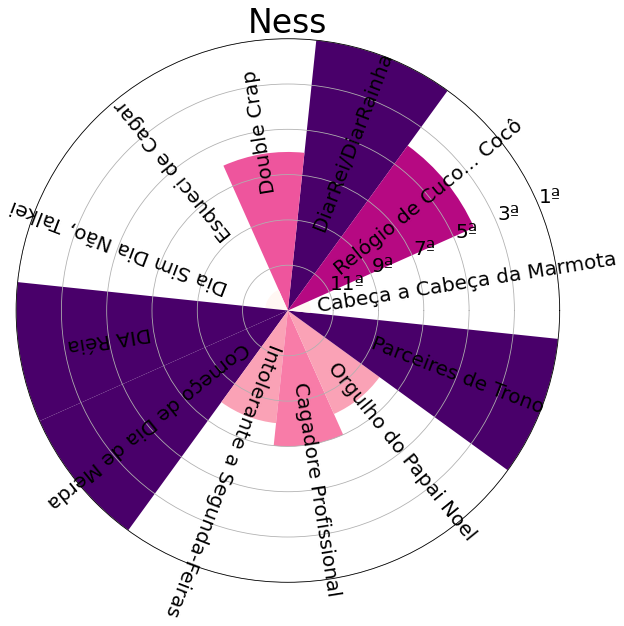

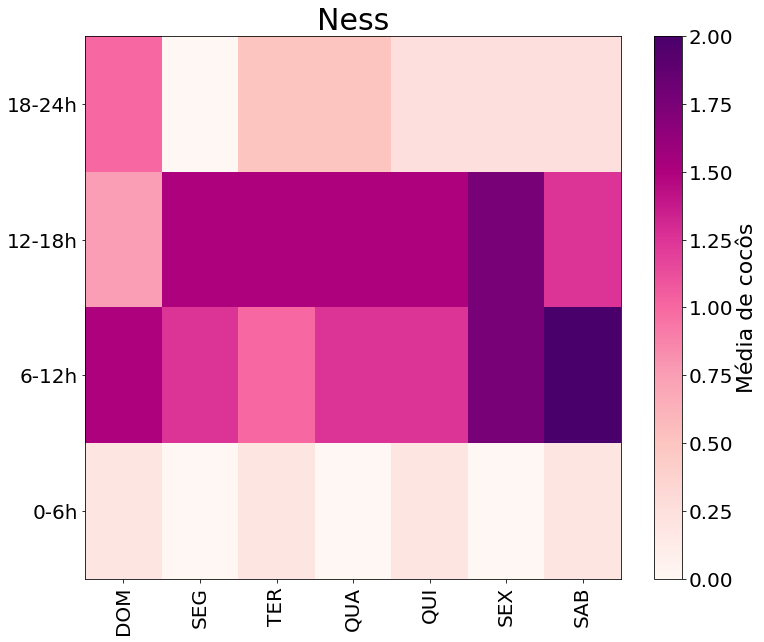

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


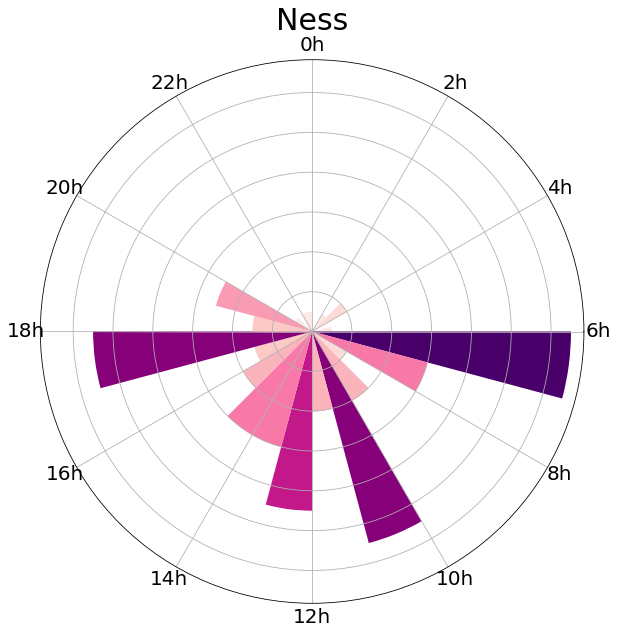

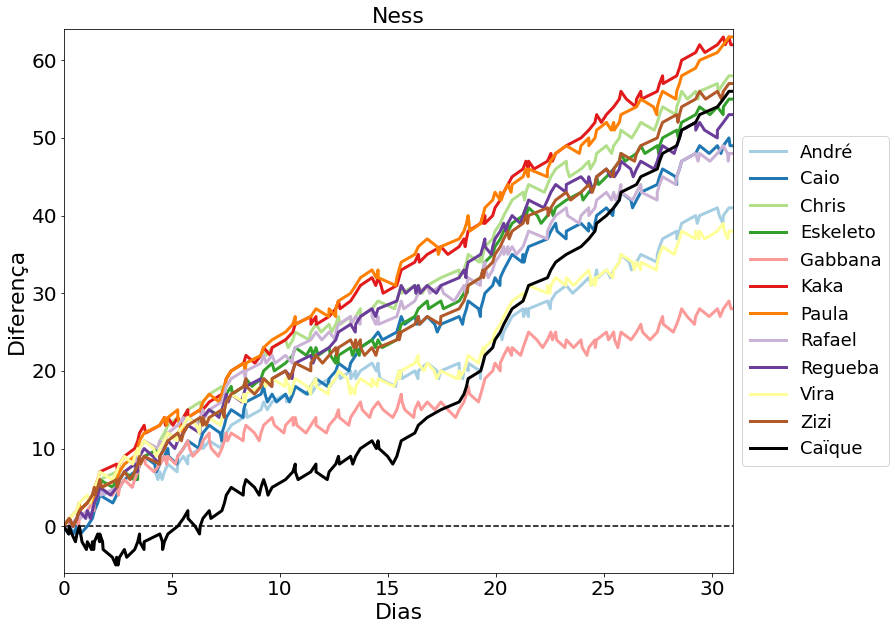

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


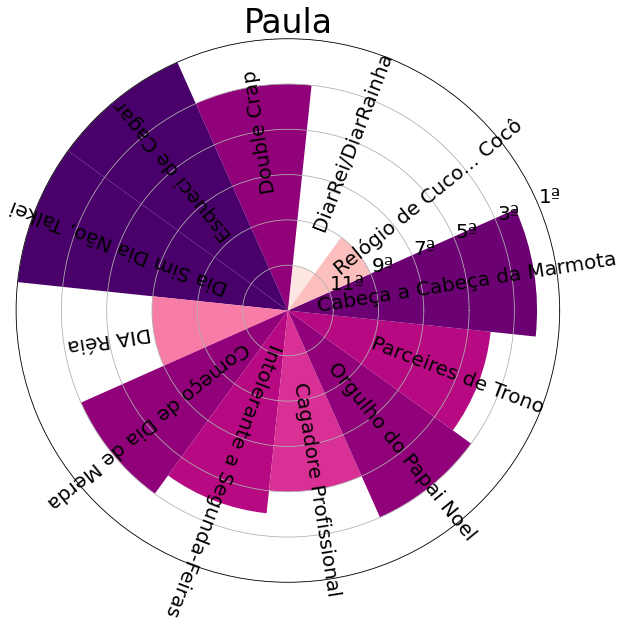

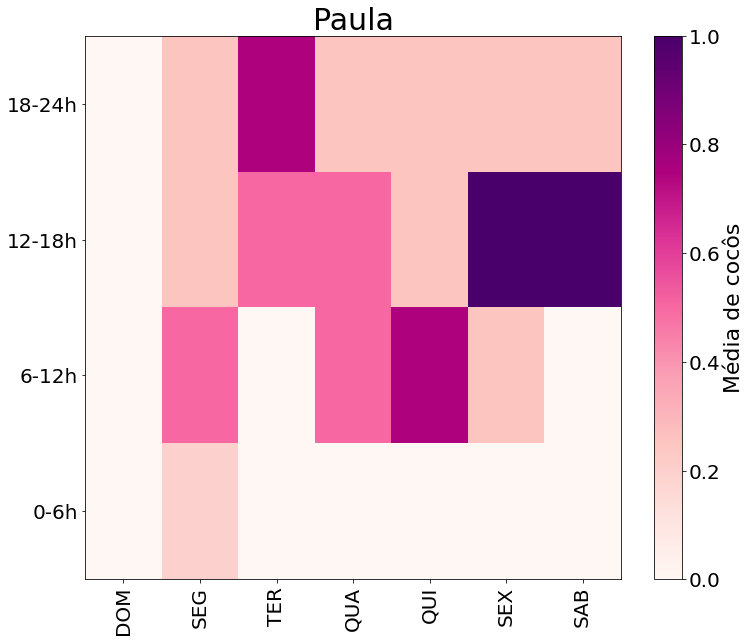

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


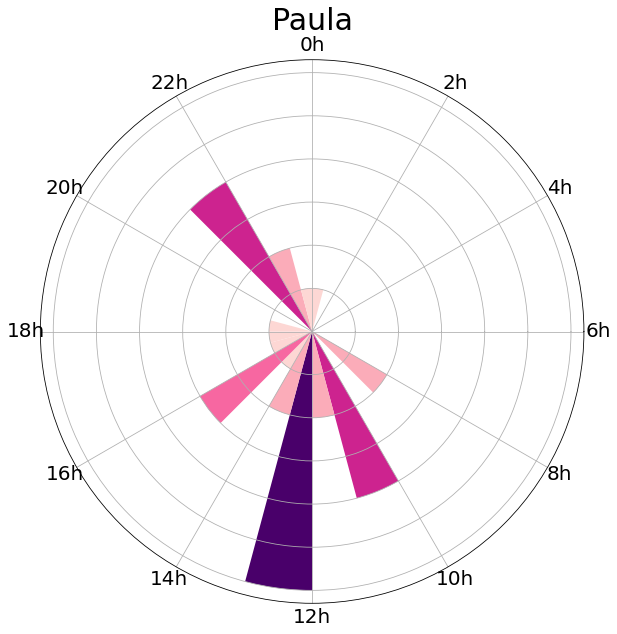

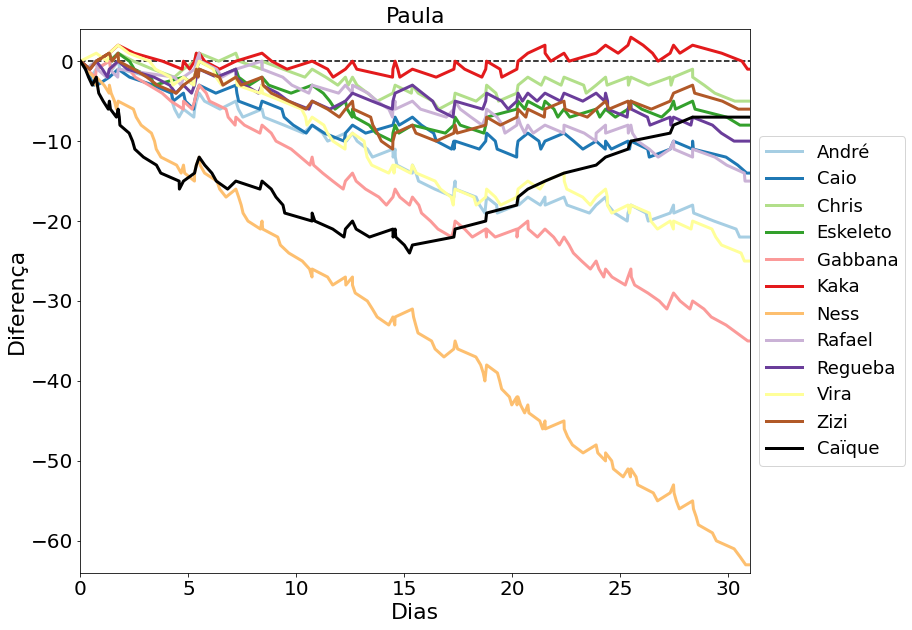

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


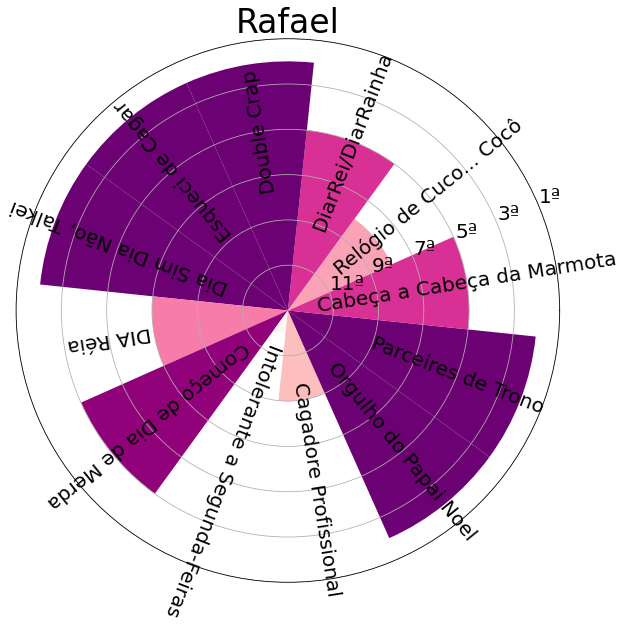

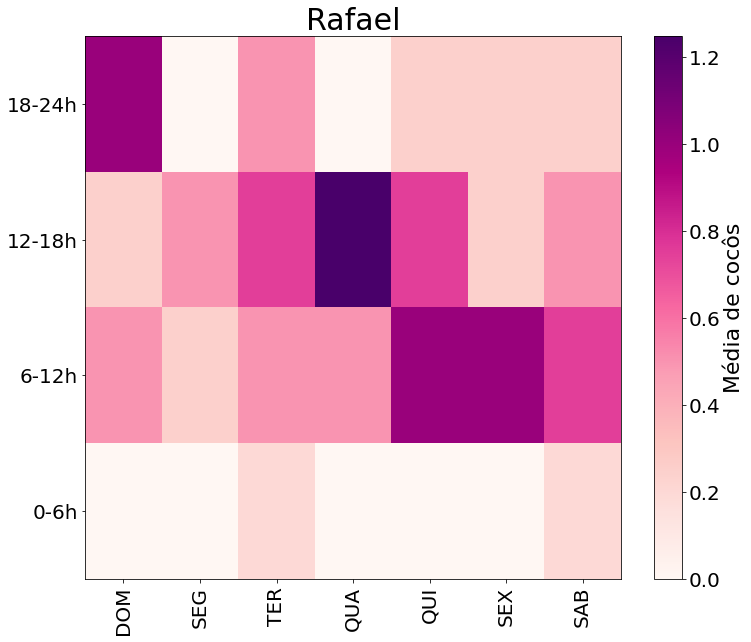

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


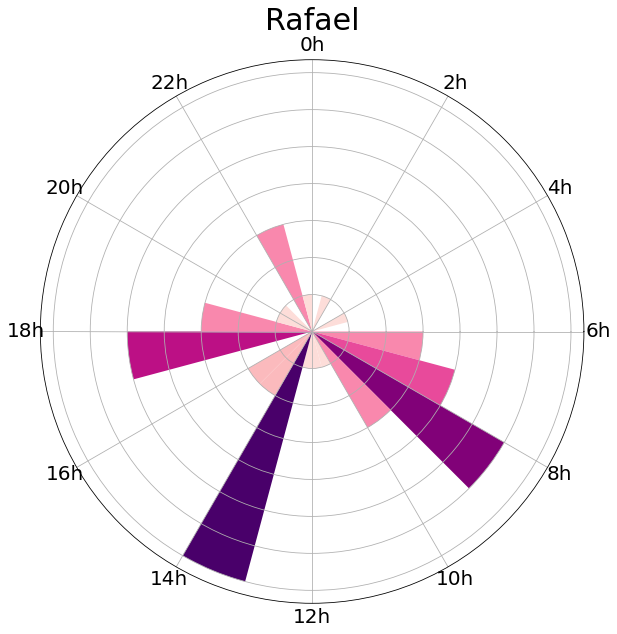

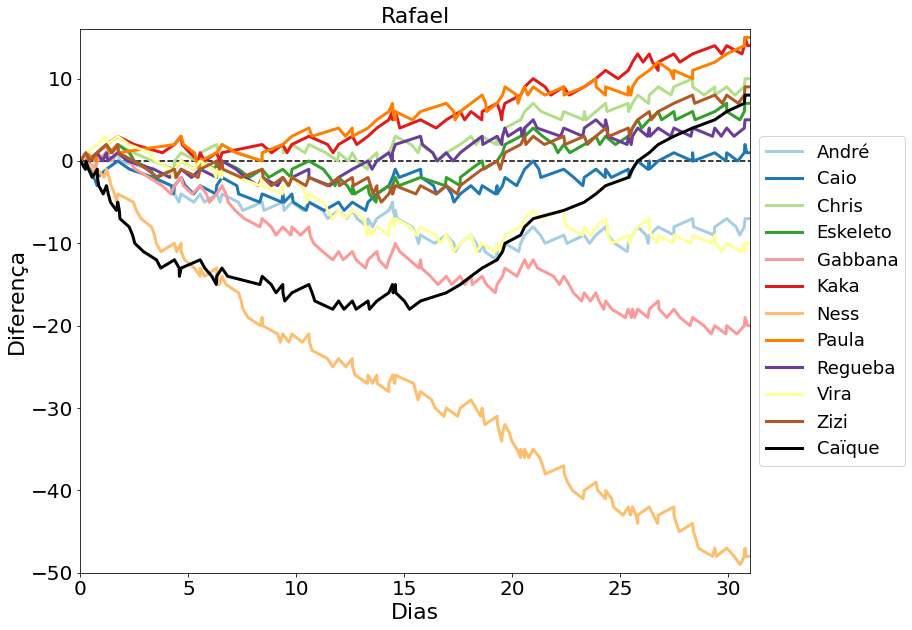

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


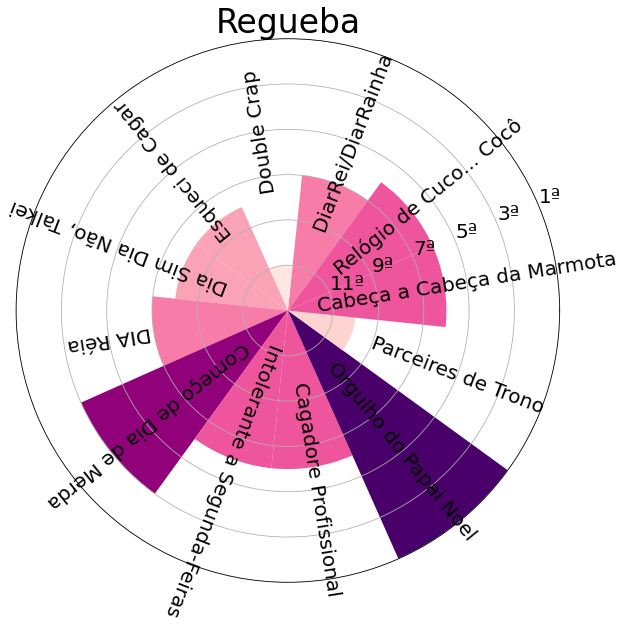

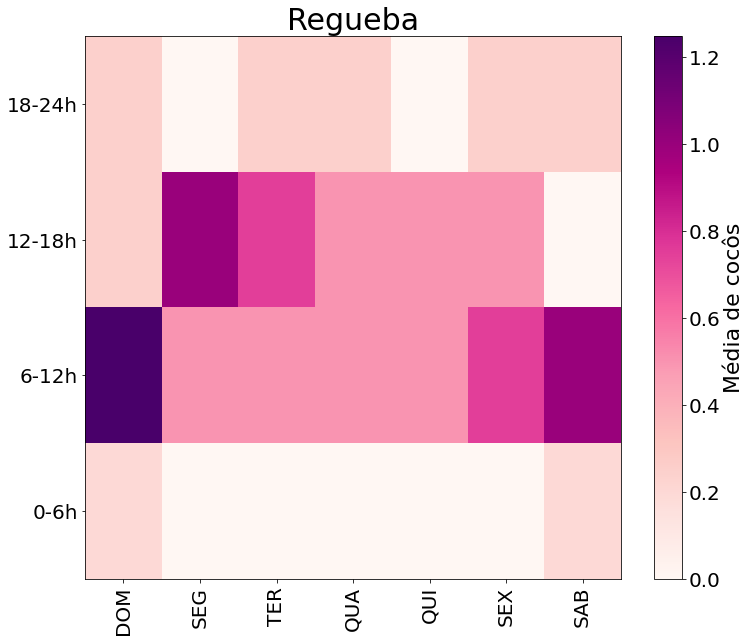

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


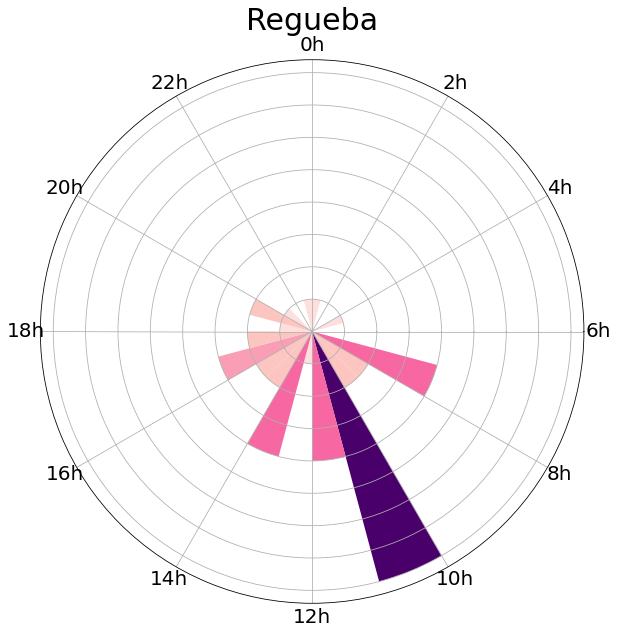

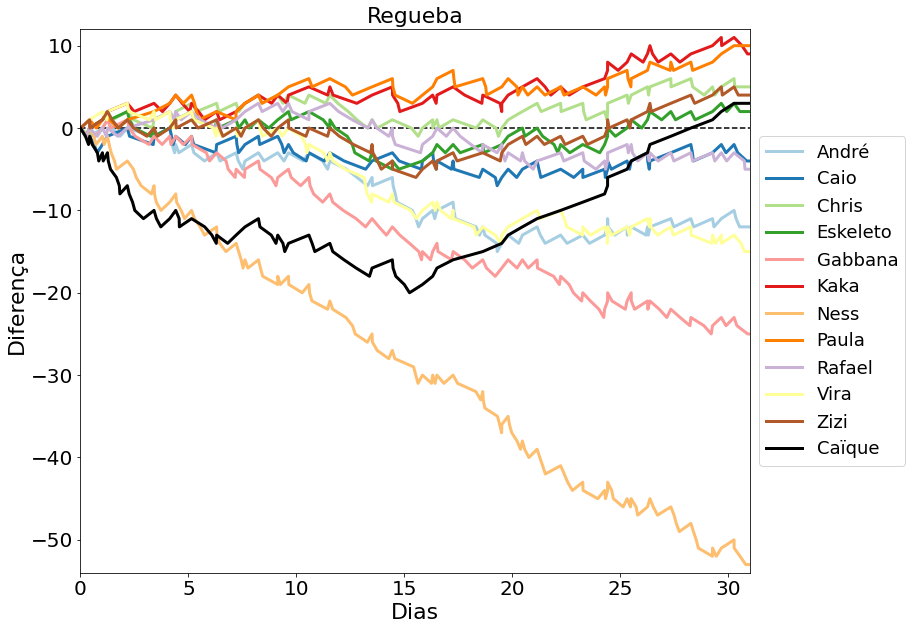

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


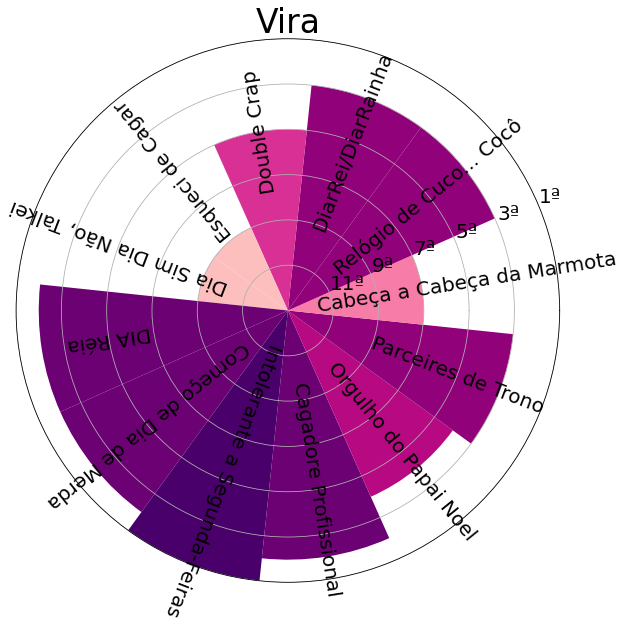

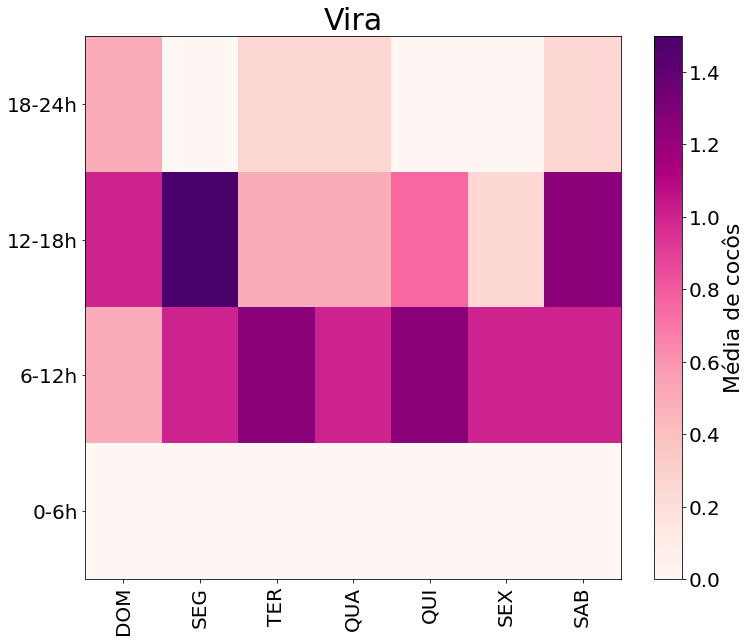

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


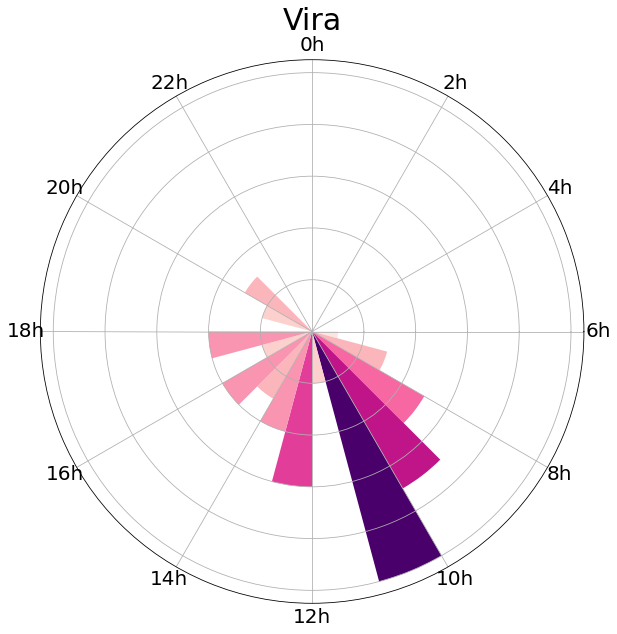

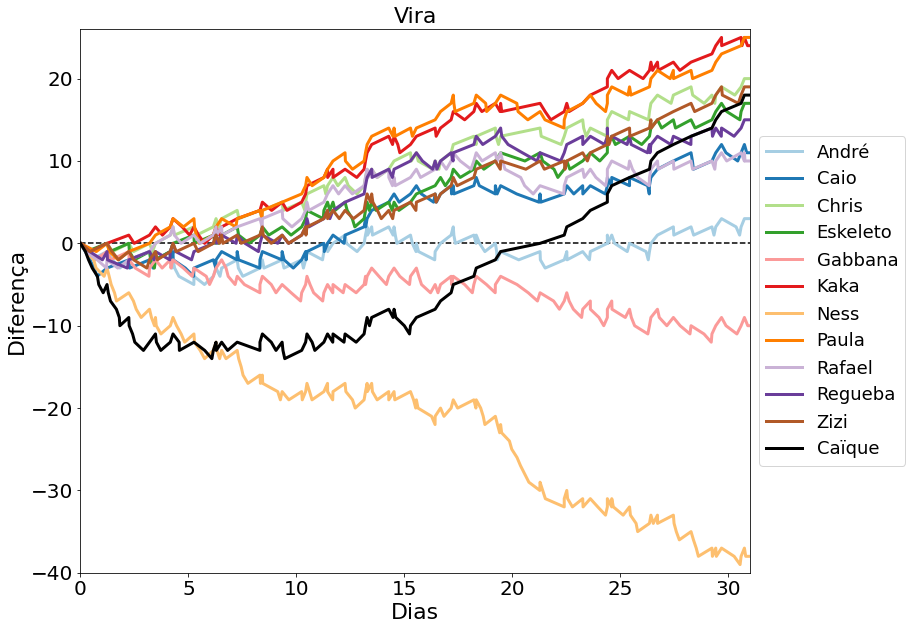

/tmp/ipykernel_6282/493497273.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["11ª","9ª","7ª","5ª","3ª","1ª"])


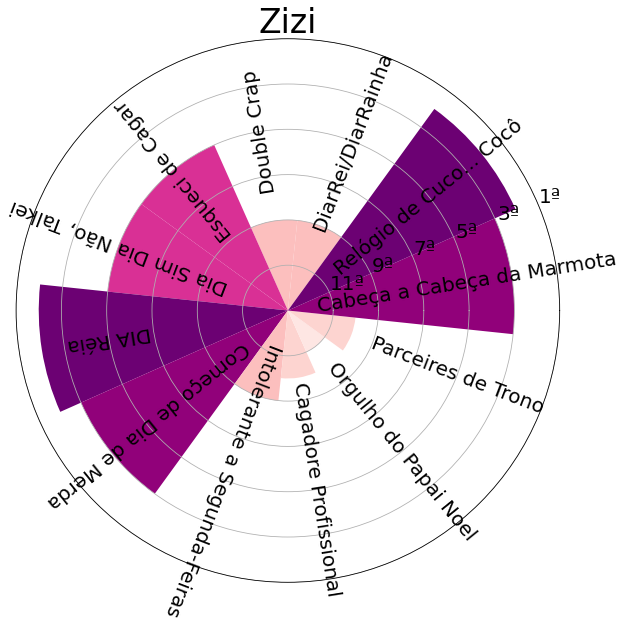

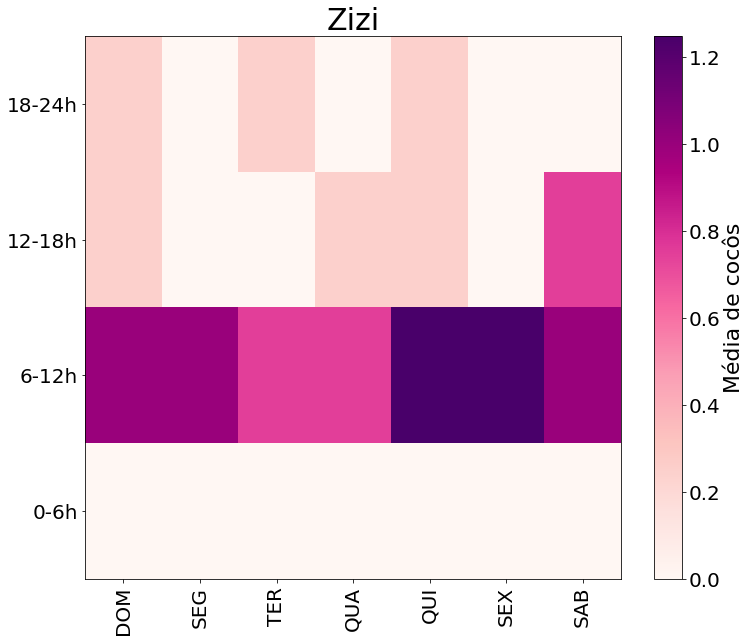

/tmp/ipykernel_6282/899816593.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","","","",""])


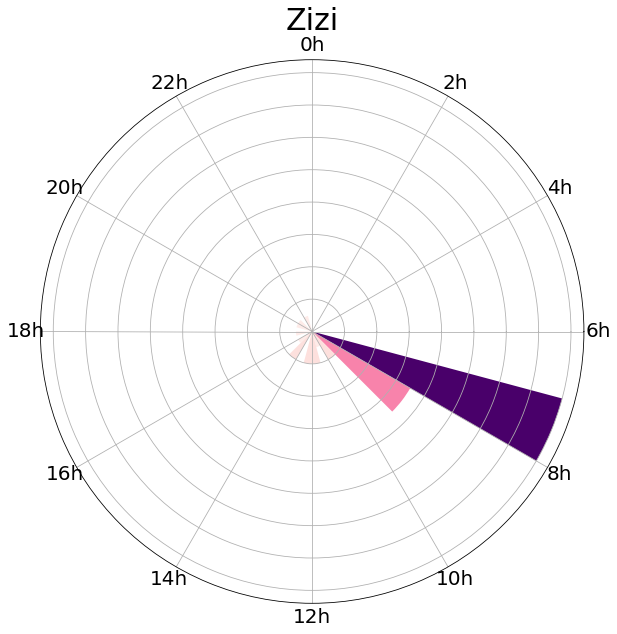

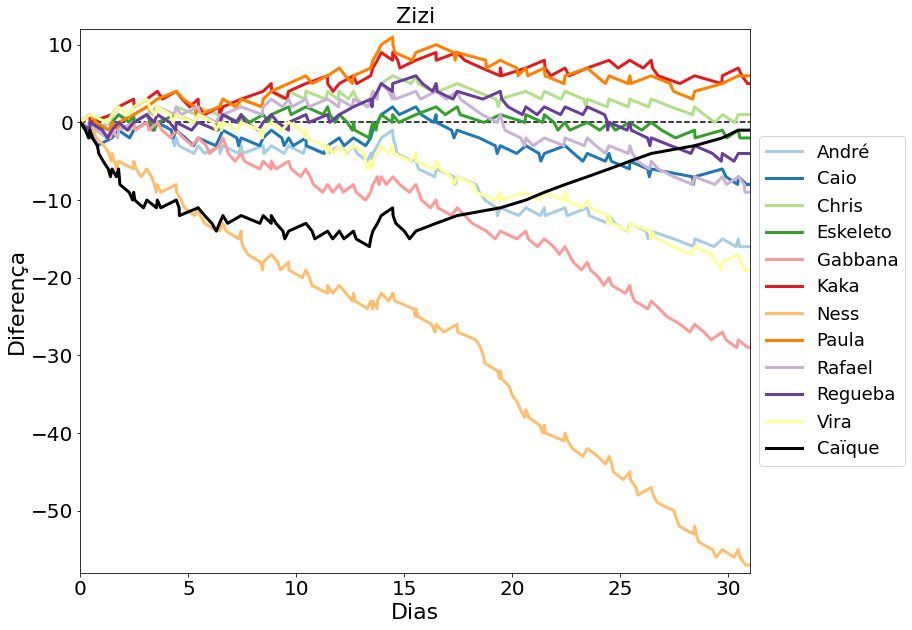

IndexError: list index out of range

In [127]:
for pessoa in labelNomes:
    i = 0
    for nome in labelNomes:
        if nome == pessoa:
            break
        else:
            i+=1
    with open(f'{pessoa}.txt', 'w') as f:
        array = []
        f.write(f"Parabéns! Em Dezembro de 2023 você fez {totalDeCocos[i]} cocôs! Uma média de {totalDeCocos[i]/31.:.2f} cocô(s)/dia! Isso te colocou na {getPosicoesOrdenadas(totalDeCocos[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria DiarRei/DiarRainha!\n\n")
        array.append(getPosicoesOrdenadas(totalDeCocos[:-1])[i])
        f.write(f"O seu menor espaço de tempo entre dois cocôs foi de {menorTempoEntreCocos[i]:.0f} minutos! Isso te colocou na {getPosicoesOrdenadas(menorTempoEntreCocos[:-1],crescente=True)[i]}ª de {len(labelNomes.keys())-1} posições na categoria Double Crap!\n\n")
        array.append(getPosicoesOrdenadas(menorTempoEntreCocos[:-1],crescente=True)[i])
        f.write(f"O seu maior espaço de tempo entre dois cocôs foi de {maiorTempoEntreCocos[i]:.2f} horas! Isso te colocou na {getPosicoesOrdenadas(maiorTempoEntreCocos[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Esqueci de Cagar!\n\n")
        array.append(getPosicoesOrdenadas(maiorTempoEntreCocos[:-1])[i])
        f.write(f"Você teve {totalDeDiasSemCoco[i]:d} dias nos quais não fez cocô! Isso te colocou na {getPosicoesOrdenadas(maiorTempoEntreCocos[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Tem Que Fazer Cocô Dia Sim, Dia Não Talkei?!!\n\n")
        array.append(getPosicoesOrdenadas(maiorTempoEntreCocos[:-1])[i])
        f.write(f"O dia {diaDoMaximo[i]} foi o seu dia mais fibroso, você fez um total de {maximoDeCocosEmUmDia[i]:d} cocôs! Isso te colocou na {getPosicoesOrdenadas(maximoDeCocosEmUmDia[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria DIA Réia!\n\n")
        array.append(getPosicoesOrdenadas(maximoDeCocosEmUmDia[:-1])[i])
        f.write(f"No dia {diaDoMaximoAteMeioDia[i]}, você fez um total de {maximoDeCocosAteMeioDia[i]:d} cocôs até meio-dia! Isso te colocou na {getPosicoesOrdenadas(maximoDeCocosAteMeioDia[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Começo de Dia de Merda!\n\n")
        array.append(getPosicoesOrdenadas(maximoDeCocosAteMeioDia[:-1])[i])
        f.write(f"Às segunda-feiras você fez uma média de um cocô a cada {1/taxaDeCocoNaSegundaFeira[i] * 24:.2f} h, em contraste com a média de um a cada {1/taxaDeCocoSemSerNaSegundaFeira[i] * 24:.2f} h nos outros dias da semana! Isso te colocou na {getPosicoesOrdenadas(taxaDeCocoNaSegundaFeira[:-1]/taxaDeCocoSemSerNaSegundaFeira[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Intolerante a Segunda-Feiras!\n\n")
        array.append(getPosicoesOrdenadas(taxaDeCocoNaSegundaFeira[:-1]/taxaDeCocoSemSerNaSegundaFeira[:-1])[i])
        f.write(f"Durante o horário comercial você fez uma média de um cocô a cada {1/taxaDeCocoHorarioComercial[i]:.2f} h, em contraste com a média de um a cada {1/taxaDeCocoHorarioLivre[i]:.2f} h no tempo livre! Isso te colocou na {getPosicoesOrdenadas(taxaDeCocoHorarioComercial[:-1]/taxaDeCocoHorarioLivre[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Cagadore Profissional!\n\n")
        array.append(getPosicoesOrdenadas(taxaDeCocoHorarioComercial[:-1]/taxaDeCocoHorarioLivre[:-1])[i])
        f.write(f"Nos 3 dias após o natal você fez uma média de um cocô a cada {1/taxaDeCocoNatal[i] * 24:.2f} h, em contraste com a média de um a cada {1/taxaDeCocoSemSerNatal[i] * 24:.2f} h nos outros dias do mês! Isso te colocou na {getPosicoesOrdenadas(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Orgulho do Papai Noel!\n\n")
        array.append(getPosicoesOrdenadas(taxaDeCocoNatal[:-1]/taxaDeCocoSemSerNatal[:-1])[i])
        f.write(f"{maximoCocoAoMesmoTempoNome[i]} foi sue principal parceire de cocô! Vocês fizeram {maximoCocoAoMesmoTempo[i]} cocôs simultâneos esse mês! Isso te colocou na {getPosicoesOrdenadas(maximoCocoAoMesmoTempo[:-1])[i]}ª de {len(labelNomes.keys())-1} posições na categoria Parceires de Trono!\n\n")
        array.append(getPosicoesOrdenadas(maximoCocoAoMesmoTempo[:-1])[i])
        f.write(f"Você e {menorDistanciaMediaNome[i]} disputaram uma corrida acirrada! A distância média de pontuação entre vocês ao longo do mês foi de {menorDistanciaMedia[i]:.2f}! Isso te colocou na {getPosicoesOrdenadas(menorDistanciaMedia[:-1],crescente=True)[i]}ª de {len(labelNomes.keys())-1} posições na categoria Cabeça a Cabeça da Marmota!\n\n")
        array.append(getPosicoesOrdenadas(np.abs(menorDistanciaMedia[:-1]),crescente=True)[i])
        f.write(f"A variância do(s) seu(s) horário(s) diário(s) de cocô foi de {variancia[i]:.2f} h! Isso te colocou na {getPosicoesOrdenadas(variancia[:-1],crescente=True)[i]}ª de {len(labelNomes.keys())-1} posições na categoria Relógio de Cuco... Cocô!\n\n")
        array.append(getPosicoesOrdenadas(variancia[:-1],crescente=True)[i])
        plotPizza(array,pessoa)
        plotHist2D(pessoa)
        plotClock(pessoa)
        plotCorrida(pessoa)
    
plotHist2D("Todos")
plotClock("Todos")

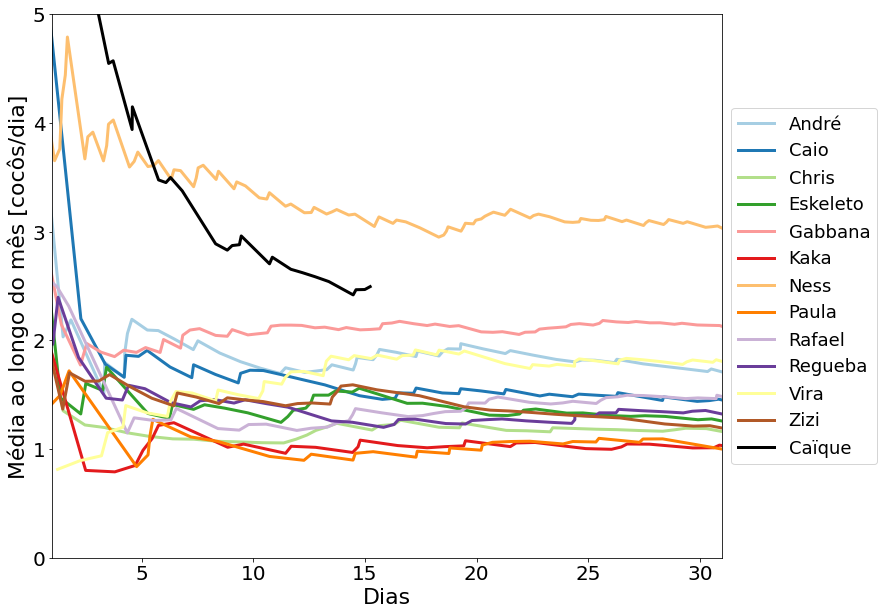

In [93]:
cmap = plt.get_cmap('Paired').colors
c=0
diasParaMedia = 3
for nome1 in labelNomes:
    tempo = [0]
    total = [0]
    x = []
    y = []
    totalPorDia = []
    diaAtual = 0
    array1 = np.array(dataFrameIndividual[nome1]['date'])
    t0 = datetime.strptime('23-12-01 00:00:00','%y-%m-%d %H:%M:%S')
    for i in array1:
        t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
        #if (t.day > diaAtual):
        #    diaAtual += 1
        #    x.append(diaAtual)
        #    if (diaAtual == 1):
        #        totalPorDia.append(total[-1])
        #        totalUltimoDia = total[-1]
        #    else:
        #        totalPorDia.append(total[-1] - totalUltimoDia)
        #        totalUltimoDia = total[-1]
        #    if (diaAtual > diasParaMedia):
        #        y.append(np.mean(totalPorDia[-diasParaMedia:]))
        #    else:
        #        y.append(np.mean(totalPorDia))
        tempo.append(((t-t0).seconds + (t-t0).days*24*3600) / 24 / 3600 )
        total.append(total[-1]+1)
        x.append(tempo[-1])
        y.append(total[-1]/tempo[-1])
    t = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
    tempo.append(((t-t0).seconds + (t-t0).days*24*3600) / 24 / 3600 )
    total.append(total[-1])
    totalPorDia.append(total[-1] - totalUltimoDia)
    if (nome1 != 'Caïque'):
        x.append(tempo[-1])
        y.append(total[-1]/tempo[-1])
#    if (c < 12):
#        plt.plot(tempo,total,label=nome1,color=cmap[c])
#    else:
#        plt.plot(tempo,total,label=nome1,color='black')
    if (c < 12):
        plt.plot(x,y,label=nome1,color=cmap[c])
    else:
        plt.plot(x,y,label=nome1,color='black')
    c+=1
ticks = []
labels = []
for i in range(31):
    if (i < 9):
        t = datetime.strptime(f'23-12-0{i+1} 00:00:00','%y-%m-%d %H:%M:%S')
        labels.append(f'0{i}/12')
    else:
        t = datetime.strptime(f'23-12-{i+1} 00:00:00','%y-%m-%d %H:%M:%S')
        labels.append(f'{i}/12')
    ticks.append((t-t0).seconds + (t-t0).days*24*3600)
t = datetime.strptime(f'24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
ticks.append((t-t0).seconds + (t-t0).days*24*3600)
labels.append(f'01/01')
plt.ylabel("Média ao longo do mês [cocôs/dia]")
plt.xlabel("Dias")
plt.xlim([1,31])
plt.ylim([0,5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

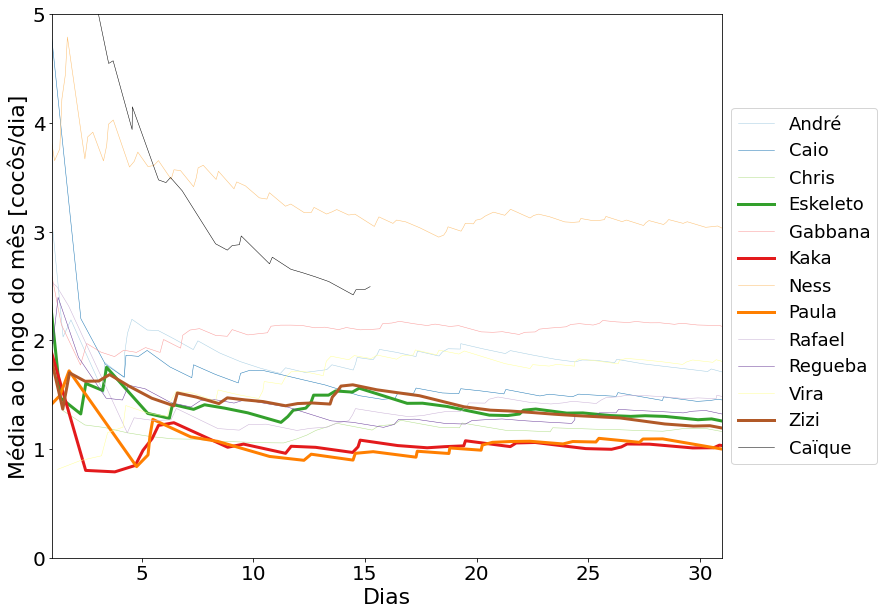

In [104]:
cmap = plt.get_cmap('Paired').colors
c=0
diasParaMedia = 3
for nome1 in labelNomes:
    tempo = [0]
    total = [0]
    x = []
    y = []
    totalPorDia = []
    diaAtual = 0
    array1 = np.array(dataFrameIndividual[nome1]['date'])
    t0 = datetime.strptime('23-12-01 00:00:00','%y-%m-%d %H:%M:%S')
    for i in array1:
        t = datetime.strptime(i[2:],'%y-%m-%d %H:%M:%S')
        #if (t.day > diaAtual):
        #    diaAtual += 1
        #    x.append(diaAtual)
        #    if (diaAtual == 1):
        #        totalPorDia.append(total[-1])
        #        totalUltimoDia = total[-1]
        #    else:
        #        totalPorDia.append(total[-1] - totalUltimoDia)
        #        totalUltimoDia = total[-1]
        #    if (diaAtual > diasParaMedia):
        #        y.append(np.mean(totalPorDia[-diasParaMedia:]))
        #    else:
        #        y.append(np.mean(totalPorDia))
        tempo.append(((t-t0).seconds + (t-t0).days*24*3600) / 24 / 3600 )
        total.append(total[-1]+1)
        x.append(tempo[-1])
        y.append(total[-1]/tempo[-1])
    t = datetime.strptime('24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
    tempo.append(((t-t0).seconds + (t-t0).days*24*3600) / 24 / 3600 )
    total.append(total[-1])
    totalPorDia.append(total[-1] - totalUltimoDia)
    if (nome1 != 'Caïque'):
        x.append(tempo[-1])
        y.append(total[-1]/tempo[-1])
#    if (c < 12):
#        plt.plot(tempo,total,label=nome1,color=cmap[c])
#    else:
#        plt.plot(tempo,total,label=nome1,color='black')
    if (c < 12):
        if (nome1 != 'Eskeleto' and nome1 != 'Zizi' and nome1 != 'Kaka' and nome1 != 'Paula'):
            plt.plot(x,y,label=nome1,color=cmap[c],linewidth=0.5)
        else:
            plt.plot(x,y,label=nome1,color=cmap[c])
    else:
        if (nome1 != 'Eskeleto' and nome1 != 'Zizi' and nome1 != 'Kaka' and nome1 != 'Paula'):
            plt.plot(x,y,label=nome1,color='black',linewidth=0.5)
        else:
            plt.plot(x,y,label=nome1,color='black')
    c+=1
ticks = []
labels = []
for i in range(31):
    if (i < 9):
        t = datetime.strptime(f'23-12-0{i+1} 00:00:00','%y-%m-%d %H:%M:%S')
        labels.append(f'0{i}/12')
    else:
        t = datetime.strptime(f'23-12-{i+1} 00:00:00','%y-%m-%d %H:%M:%S')
        labels.append(f'{i}/12')
    ticks.append((t-t0).seconds + (t-t0).days*24*3600)
t = datetime.strptime(f'24-01-01 00:00:00','%y-%m-%d %H:%M:%S')
ticks.append((t-t0).seconds + (t-t0).days*24*3600)
labels.append(f'01/01')
plt.ylabel("Média ao longo do mês [cocôs/dia]")
plt.xlabel("Dias")
plt.xlim([1,31])
plt.ylim([0,5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()